#**Exploratory Data Analysis**

*  Reviewing the provided ecommerce customer data to familiarise with the variables and their structure.

*  Checking the data quality, missing values, and potential errors.

*  Determining if any data pre-processing is necessary or not

*  Investigate the relationship between variables to identify any correlations or patterns.

*  Visualize the data to gain insights into the behavior and characteristics of the customers.

### **Dataset Overview**

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:.2f}'.format
import missingno as msno

from sklearn.experimental import enable_iterative_imputer  # Enables the experimental IterativeImputer in scikit-learn.
from sklearn.impute import IterativeImputer, SimpleImputer  # Imports imputers to handle missing data.
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Imports tools for data preprocessing (scaling and encoding).
from sklearn.ensemble import RandomForestRegressor  # Imports RandomForestRegressor for regression tasks using ensemble methods.
from sklearn.compose import ColumnTransformer  # Imports ColumnTransformer for applying different preprocessing steps to different columns.
from sklearn.model_selection import RandomizedSearchCV  # Imports RandomizedSearchCV for hyperparameter tuning.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline  # Imports Pipeline for creating machine learning workflows.
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay)  # Imports metrics for evaluating model performance.
from sklearn.model_selection import train_test_split  # Imports function to split data into training and testing sets.
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading Excel using Pandas and storing in dataframe
df = pd.read_excel('/content/drive/MyDrive/Customer Churn Prediction/ECommerce_Dataset.xlsx', sheet_name='E Comm')
display(df)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1    4.00         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1    0.00                Phone         3   
4          50005      1    0.00                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0   10.00             Computer         1   
5626       55627      0   13.00         Mobile Phone         1   
5627       55628      0    1.00         Mobile Phone         1   
5628       55629      0   23.00             Computer         3   
5629       55630      0    8.00         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                6.00           Debit Card  Female            3.00   
1                8.00                  UPI    Male            3.00   
2               30.00           Debit Card    Male            2.00   
3               15.00           Debit Card    Male            2.00   
4               12.00                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625            30.00          Credit Card    Male            3.00   
5626            13.00          Credit Card    Male            3.00   
5627            11.00           Debit Card    Male            3.00   
5628             9.00          Credit Card    Male            4.00   
5629            15.00          Credit Card    Male            3.00   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                        11.00   
1           Single                7         1                        15.00   
2           Single                6         1                        14.00   
3           Single                8         0                        23.00   
4           Single                3         0                        11.00   
...            ...              ...       ...                          ...   
5625       Married                6         0                        18.00   
5626       Married                6         0                        16.00   
5627       Married                3         1                        21.00   
5628       Married                4         0                        15.00   
5629       Married                4         0                        13.00   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0           1.00        1.00               5.00          159.93  
1           0.00        1.00               0.00          120.90  
2           0.00        1.00               3.00          120.28  
3           0.00        1.00               3.00          134.07  
4           1.00        1.00               3.00          129.60  
...          ...         ...                ...             ...  
5625        1.00        2.00               4.00          150.71  
5626        1.00        2.00  

In [4]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1    4.00         Mobile Phone         3             6.00   
1       50002      1     NaN                Phone         1             8.00   
2       50003      1     NaN                Phone         1            30.00   
3       50004      1    0.00                Phone         3            15.00   
4       50005      1    0.00                Phone         1            12.00   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female            3.00                         3   
1                  UPI    Male            3.00                         4   
2           Debit Card    Male            2.00                         4   
3           Debit Card    Male            2.00                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                        11.00        1.00        1.00   
1         1                        15.00        0.00        1.00   
2         1                        14.00        0.00        1.00   
3         0                        23.00        0.00        1.00   
4         0                        11.00        1.00        1.00   

   DaySinceLastOrder  CashbackAmount  
0               5.00          159.93  
1               0.00          120.90  
2               3.00          120.28  
3               3.00          134.07  
4               3.00          129.60

In [5]:
#Data Info
df.shape

(5630, 20)

In [6]:
#Columns of the dataset
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
#Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### **Finding Null and Duplicate values**

In [8]:
# detect duplicate values
print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())


Number of duplicate rows:  0


In [9]:
# detect null values
df.isnull()

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
0          False  False   False                 False     False   
1          False  False    True                 False     False   
2          False  False    True                 False     False   
3          False  False   False                 False     False   
4          False  False   False                 False     False   
...          ...    ...     ...                   ...       ...   
5625       False  False   False                 False     False   
5626       False  False   False                 False     False   
5627       False  False   False                 False     False   
5628       False  False   False                 False     False   
5629       False  False   False                 False     False   

      WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
0               False                 False   False           False   
1               False                 False   False           False   
2               False                 False   False           False   
3               False                 False   False           False   
4               False                 False   False            True   
...               ...                   ...     ...             ...   
5625            False                 False   False           False   
5626            False                 False   False           False   
5627            False                 False   False           False   
5628            False                 False   False           False   
5629            False                 False   False           False   

      NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
0                        False             False              False   
1                        False             False              False   
2                        False             False              False   
3                        False             False              False   
4                        False             False              False   
...                        ...               ...                ...   
5625                     False             False              False   
5626                     False             False              False   
5627                     False             False              False   
5628                     False             False              False   
5629                     False             False              False   

      MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0             False            False     False                        False   
1             False            False     False                        False   
2             False            False     False                        False   
3             False            False     False                        False   
4             False            False     False                        False   
...             ...              ...       ...                          ...   
5625          False            False     False                        False   
5626          False            False     False                        False   
5627          False            False     False                        False   
5628          False            False     False                        False   
5629          False            False     False                        False   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0          False       False              False           False  
1          False       False              False           False  
2          False       False              False           False  
3          False       False              False           False  
4          False       False              False           False  
...          ...         ...                ...             ...  
5625       False       False              False           False  
5626       False  

In [10]:
# the sum of null values
grouped_data = []
for col in df.columns: # Get column names directly from the DataFrame
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage' and get the size
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()

# Reset the index to convert the result into a DataFrame and drop the last column
result_df = result.reset_index(name='count').drop(columns=['count'])

# Rename columns
result_df = result_df.rename(columns={
    'column': 'Column_Name',
    'n_missing': 'No_of_Missing_Values',
    'percentage': 'Percentage'
})

display(result_df)

Column_Name  No_of_Missing_Values  Percentage
0                CashbackAmount                     0        0.00
1                         Churn                     0        0.00
2                      CityTier                     0        0.00
3                      Complain                     0        0.00
4                    CouponUsed                   256        4.55
5                    CustomerID                     0        0.00
6             DaySinceLastOrder                   307        5.45
7                        Gender                     0        0.00
8                HourSpendOnApp                   255        4.53
9                 MaritalStatus                     0        0.00
10              NumberOfAddress                     0        0.00
11     NumberOfDeviceRegistered                     0        0.00
12  OrderAmountHikeFromlastYear                   265        4.71
13                   OrderCount                   258        4.58
14             PreferedOrderCat                     0        0.00
15         PreferredLoginDevice                     0        0.00
16         PreferredPaymentMode                     0        0.00
17            SatisfactionScore                     0        0.00
18                       Tenure                   264        4.69
19              WarehouseToHome                   251        4.46

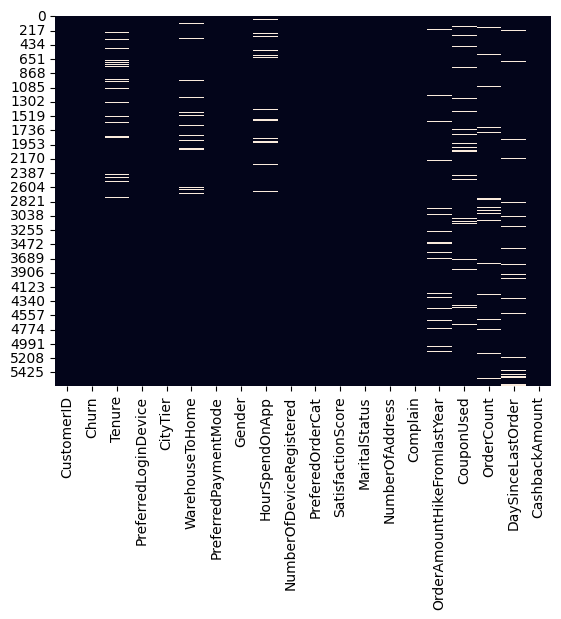

In [11]:
#Heatmap for null values
sns.heatmap(df.isnull(),cmap = 'rocket',cbar = False);


> * The columns/attributes with missing values are:
  1. Tenure
  2. WarehouseToHome
  3. HoursSpendOnApp
  4. OrderAmountHikeFromlastYear
  5. CouponUsed
  6. OrderCount
  7. DaySinceLastOrder




In [12]:
# Check unique values
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

### **Detecting Outliers**

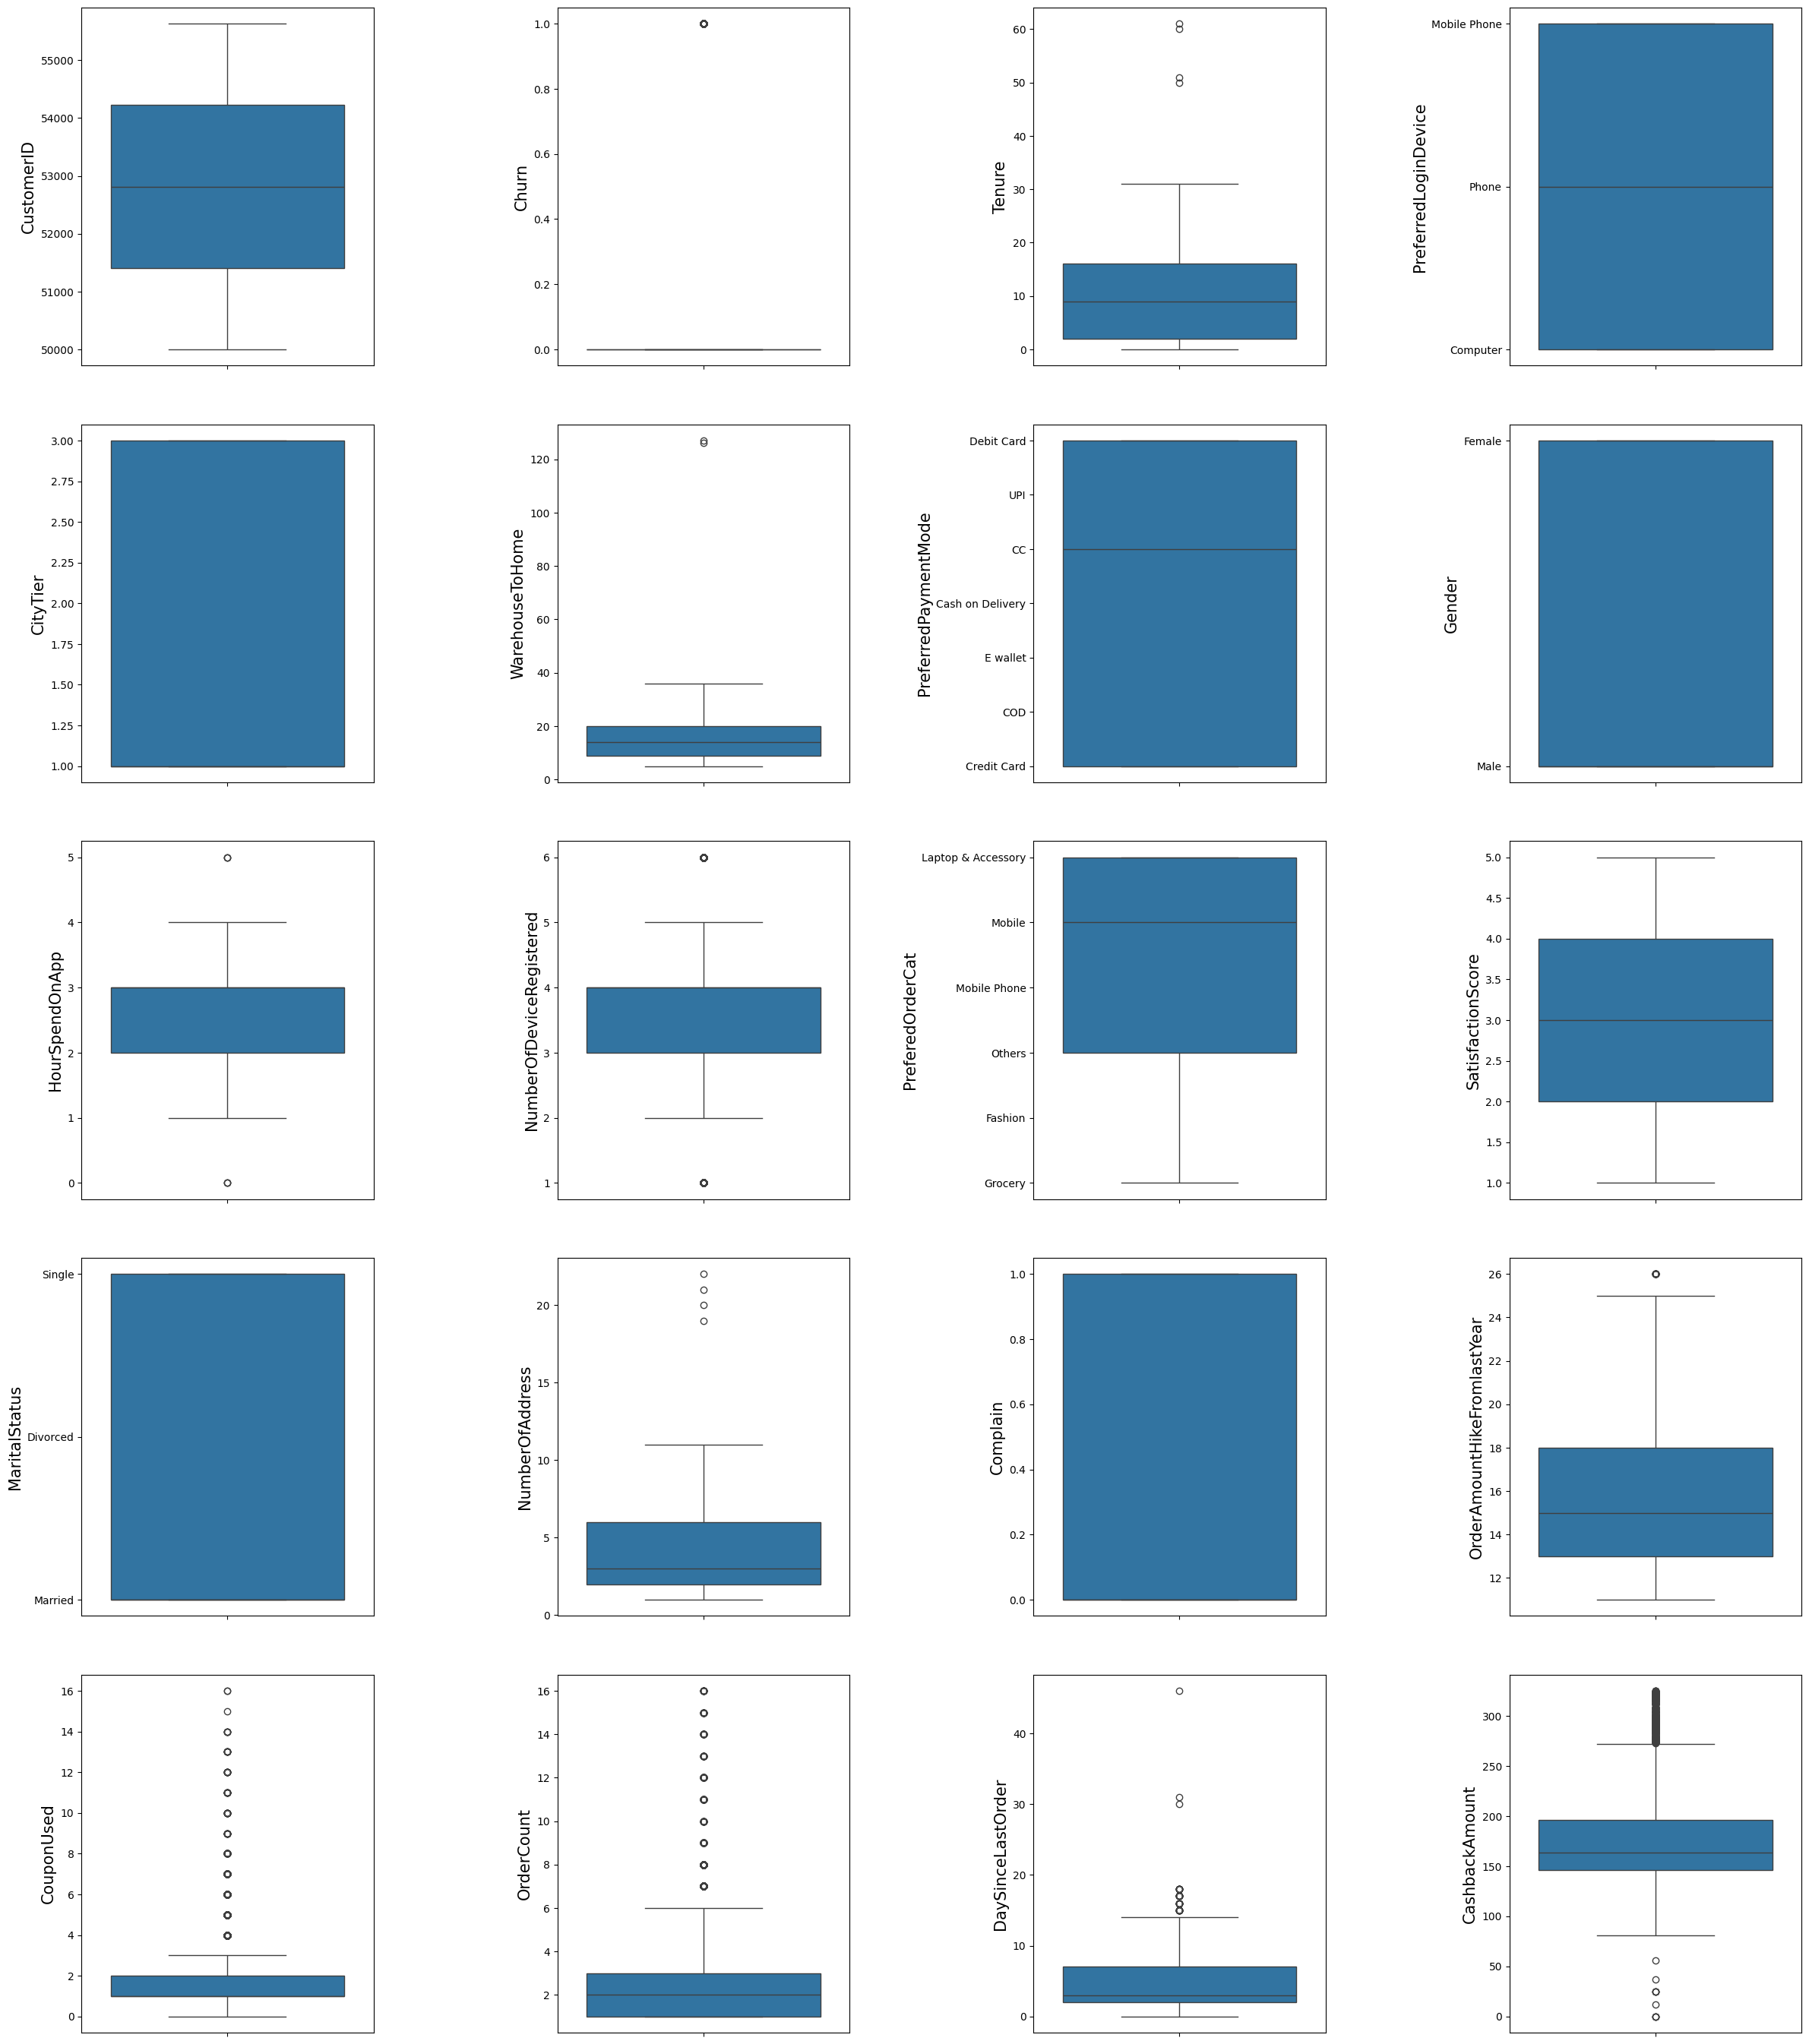

In [13]:
#Boxplots to detect potential outliers
fig = plt.figure(figsize=(25,50))
for i in range(len(df.columns)):
    ax = fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i], ax=ax)
    ax.set_ylabel(df.columns[i], fontsize=15)

plt.tight_layout(pad=5.0)
plt.show()

* The columns/attributes with potential outliers are:
  1. Tenure
  2. WarehouseToHome
  3. HoursSpendOnApp
  4. NumberOfDeviceRegistered
  5. CouponUsed
  6. OrderCount
  7. DaySinceLastOrder
  8. NumberOfAddress
  9. CashbackAmount


### **Categorical Variable Analysis & Descriptive Statistics**

In [14]:
#Dropping CustomerID since it is customer's unique identifier and has no effect on predicting churn
df.drop(columns="CustomerID", inplace=True)

In [15]:
#Printing out numerical and categorical features
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if df[i].dtype == 'object' or i in ['CityTier', 'Churn', 'Complain']:
        categorical_features.append(i)
    elif df[i].dtype == 'int64' or df[i].dtype == 'float64':
        numerical_features.append(i)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Churn PreferredLoginDevice CityTier PreferredPaymentMode Gender PreferedOrderCat MaritalStatus Complain
Numerical Features : Tenure WarehouseToHome HourSpendOnApp NumberOfDeviceRegistered SatisfactionScore NumberOfAddress OrderAmountHikeFromlastYear CouponUsed OrderCount DaySinceLastOrder CashbackAmount


#### **Analysis of Categorical Features**

In [16]:
display(df[categorical_features])

Churn PreferredLoginDevice  CityTier PreferredPaymentMode  Gender  \
0         1         Mobile Phone         3           Debit Card  Female   
1         1                Phone         1                  UPI    Male   
2         1                Phone         1           Debit Card    Male   
3         1                Phone         3           Debit Card    Male   
4         1                Phone         1                   CC    Male   
...     ...                  ...       ...                  ...     ...   
5625      0             Computer         1          Credit Card    Male   
5626      0         Mobile Phone         1          Credit Card    Male   
5627      0         Mobile Phone         1           Debit Card    Male   
5628      0             Computer         3          Credit Card    Male   
5629      0         Mobile Phone         1          Credit Card    Male   

        PreferedOrderCat MaritalStatus  Complain  
0     Laptop & Accessory        Single         1  
1                 Mobile        Single         1  
2                 Mobile        Single         1  
3     Laptop & Accessory        Single         0  
4                 Mobile        Single         0  
...                  ...           ...       ...  
5625  Laptop & Accessory       Married         0  
5626             Fashion       Married         0  
5627  Laptop & Accessory       Married         1  
5628  Laptop & Accessory       Married         0  
5629  Laptop & Accessory       Married         0  

[5630 rows x 8 columns]

In [17]:
# Show the unique values for each of the categorical features
for col_cat in categorical_features:
        print(str(col_cat) + ' : ' + str(df[col_cat].unique()))
        print(df[col_cat].value_counts())
        print("________________________________________________________________________________")

Churn : [1 0]
Churn
0    4682
1     948
Name: count, dtype: int64
________________________________________________________________________________
PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
________________________________________________________________________________
CityTier : [3 1 2]
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Gender
Ma

In [18]:
#Analysis the distribution before modification
desc = df[categorical_features].describe(include='O').T
desc['values'] = desc.index.map(lambda col: df[col].unique().tolist())
desc.style.background_gradient(axis=None, cmap="Blues", vmin=0, vmax=9000)

In [19]:
#As Mobile Phone and Phone are both same, so we have merged them into one for the column 'PreferredLoginDevice'
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

#Similarly Mobile Phone and Mobile are both same, so we have merged them into one for the column 'PreferredOrderCat'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [20]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [21]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [22]:
#As COD and Cash on Delivery are both same, so we have merged them into one for the column 'PreferredPaymentMode'
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function

#As CC and Credit Card are also both same, so we have merged them
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [23]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

##### **Analysing Categorical Features after modification**

In [24]:
display(df[categorical_features])

Churn PreferredLoginDevice  CityTier PreferredPaymentMode  Gender  \
0         1         Mobile Phone         3           Debit Card  Female   
1         1         Mobile Phone         1                  UPI    Male   
2         1         Mobile Phone         1           Debit Card    Male   
3         1         Mobile Phone         3           Debit Card    Male   
4         1         Mobile Phone         1          Credit Card    Male   
...     ...                  ...       ...                  ...     ...   
5625      0             Computer         1          Credit Card    Male   
5626      0         Mobile Phone         1          Credit Card    Male   
5627      0         Mobile Phone         1           Debit Card    Male   
5628      0             Computer         3          Credit Card    Male   
5629      0         Mobile Phone         1          Credit Card    Male   

        PreferedOrderCat MaritalStatus  Complain  
0     Laptop & Accessory        Single         1  
1           Mobile Phone        Single         1  
2           Mobile Phone        Single         1  
3     Laptop & Accessory        Single         0  
4           Mobile Phone        Single         0  
...                  ...           ...       ...  
5625  Laptop & Accessory       Married         0  
5626             Fashion       Married         0  
5627  Laptop & Accessory       Married         1  
5628  Laptop & Accessory       Married         0  
5629  Laptop & Accessory       Married         0  

[5630 rows x 8 columns]

In [25]:
# Show the unique values for each of the categorical features after modification

for col_cat in categorical_features:
        print(str(col_cat) + ' : ' + str(df[col_cat].unique()))
        print(df[col_cat].value_counts())
        print("----" * 25)

Churn : [1 0]
Churn
0    4682
1     948
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
PreferredLoginDevice : ['Mobile Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
CityTier : [3 1 2]
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
PreferredPaymentMode : ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender : ['Female' 'Male']
Gender
Male      33

In [26]:
#Analysis the disitribution after modification
desc = df[categorical_features].describe(include='O').T
desc['values_after_modification'] = desc.index.map(lambda col: df[col].unique().tolist())
desc.style.background_gradient(axis=None, cmap="Blues", vmin=0, vmax=9000)

#### **Analysis of Numerical Features**

In [27]:
display(df[numerical_features])

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0       4.00             6.00            3.00                         3   
1        NaN             8.00            3.00                         4   
2        NaN            30.00            2.00                         4   
3       0.00            15.00            2.00                         4   
4       0.00            12.00             NaN                         3   
...      ...              ...             ...                       ...   
5625   10.00            30.00            3.00                         2   
5626   13.00            13.00            3.00                         5   
5627    1.00            11.00            3.00                         2   
5628   23.00             9.00            4.00                         5   
5629    8.00            15.00            3.00                         2   

      SatisfactionScore  NumberOfAddress  OrderAmountHikeFromlastYear  \
0                     2                9                        11.00   
1                     3                7                        15.00   
2                     3                6                        14.00   
3                     5                8                        23.00   
4                     5                3                        11.00   
...                 ...              ...                          ...   
5625                  1                6                        18.00   
5626                  5                6                        16.00   
5627                  4                3                        21.00   
5628                  4                4                        15.00   
5629                  3                4                        13.00   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0           1.00        1.00               5.00          159.93  
1           0.00        1.00               0.00          120.90  
2           0.00        1.00               3.00          120.28  
3           0.00        1.00               3.00          134.07  
4           1.00        1.00               3.00          129.60  
...          ...         ...                ...             ...  
5625        1.00        2.00               4.00          150.71  
5626        1.00        2.00                NaN          224.91  
5627        1.00        2.00               4.00          186.42  
5628        2.00        2.00               9.00          178.90  
5629        2.00        2.00               3.00          169.04  

[5630 rows x 11 columns]

In [28]:
# Show the unique values on each numerical features
for col_num in numerical_features:
        print(str(col_num) + ' : ' + str(df[col_num].unique()))
        print(df[col_num].value_counts())
        print("----" * 25)

Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Tenure
1.00     690
0.00     508
8.00     263
9.00     247
7.00     221
10.00    213
5.00     204
4.00     203
3.00     195
11.00    194
6.00     183
12.00    182
13.00    181
14.00    176
2.00     167
15.00    159
16.00    149
19.00    140
18.00    123
20.00    109
17.00    106
23.00     89
21.00     84
22.00     76
24.00     75
28.00     70
30.00     66
27.00     66
26.00     60
25.00     59
29.00     55
31.00     49
50.00      1
60.00      1
51.00      1
61.00      1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
WarehouseToHome : [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
WarehouseToHome
9.00      559
8.00      

##### **Descriptive Statistics**

* Count
* Mean
* Median
* Standard Deviation
* Variance
* Minimum
* 25%
* 50%
* 75%
* Maximum
* Skewness
* Kurtosis



In [29]:
# Calculate descriptive statistics
desc_stats = df[numerical_features].describe().T


desc_stats['Median'] = df[numerical_features].median()
desc_stats['Variance'] = df[numerical_features].var()
desc_stats['Skewness'] = df[numerical_features].skew()
desc_stats['Kurtosis'] = df[numerical_features].kurtosis()

# Apply styling
styled_desc_stats = desc_stats.style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000)

# Display the styled DataFrame
styled_desc_stats

### **Correlation Heatmap Analysis**

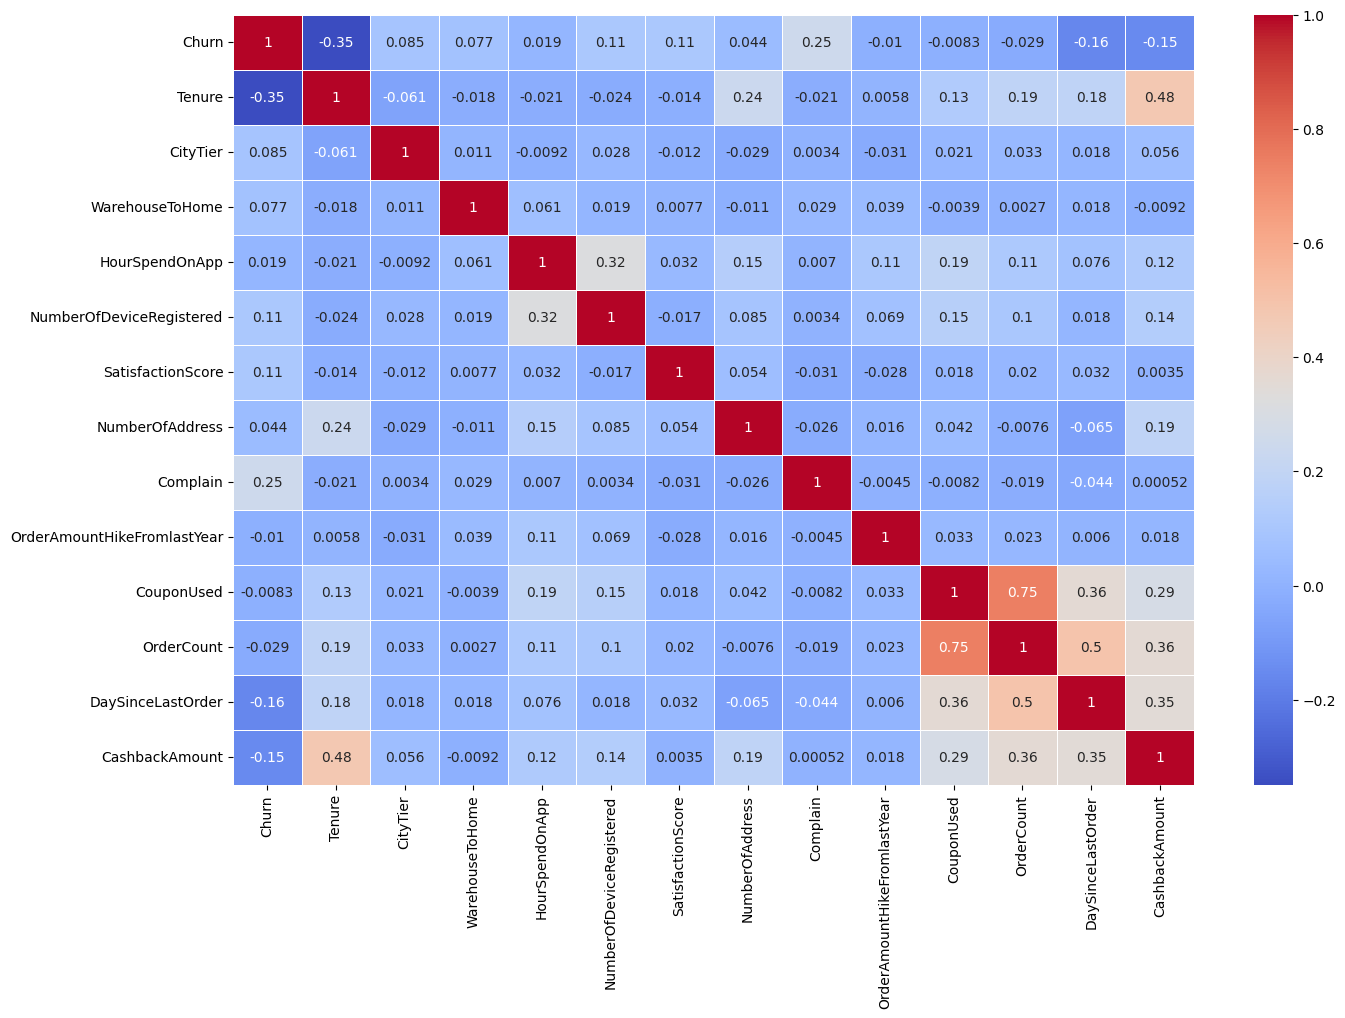

In [30]:
plt.figure(figsize=(15.5, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### **Understanding Relationship between Features**

In [31]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [32]:
#Converting Numerical Features with datatype int64 to Categorical Features

df1 = df.copy()
for col in df1.columns:
    if df1[col].dtype == 'int' or (df1[col].dtype == 'float' and col == 'HourSpendOnApp'):
        df1[col] = df[col].astype(str)

df1.dtypes

Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                  object
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object



> * The datatypes of columns **Churn**, **CityTier**, **NumberOfDeviceRegistered**, **SatisfactionScore**, **NumberOfAddress** and **Complain** changed from int64 to object
* The datatype of column **HoursSpendOnApp** changed from float to object


In [33]:
# Info about Categorical cols after Converting
df1.describe(include='O').T.style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000)

In [34]:
# Info about Numerical cols after Converting
df1.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

In [35]:
updated_categorical_features = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered',
                                'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'HourSpendOnApp', 'Complain']

updated_numerical_features = ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed',
                              'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

outcome = ['Churn']

#### **Distribution of Categorical and Numerical Features**

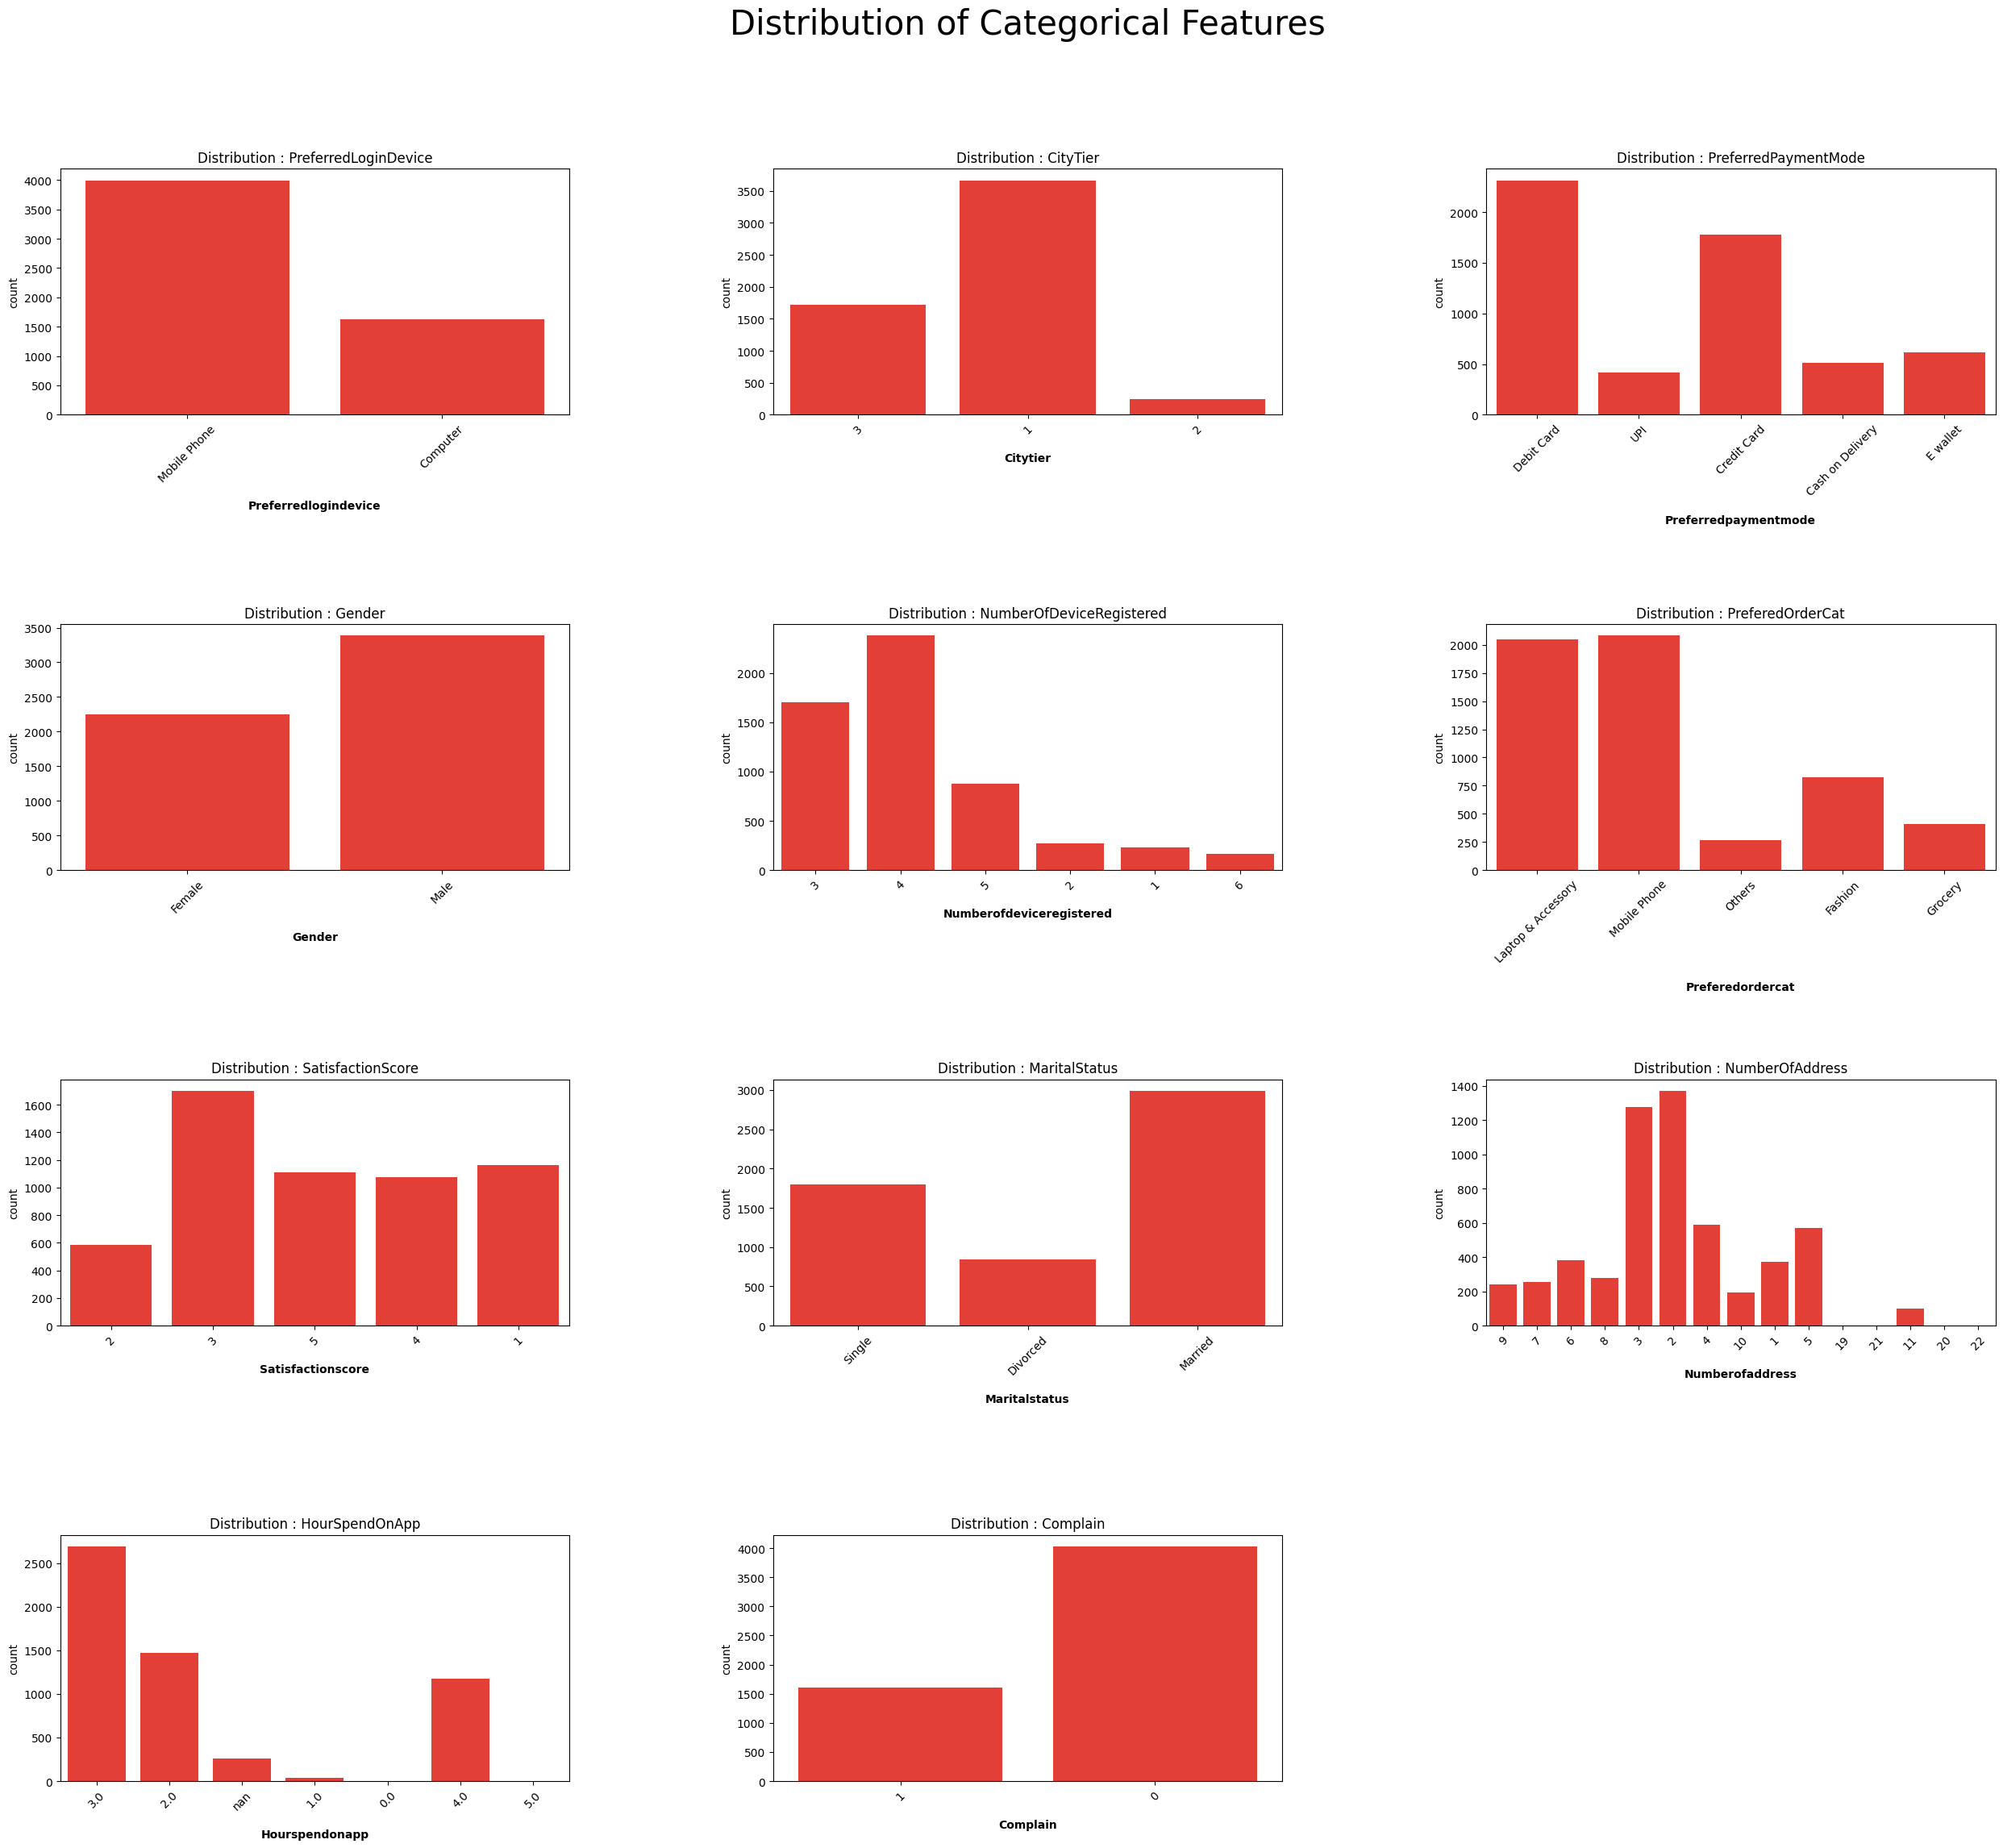

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#FE251B','#FFFFFF']
# Create enough subplots to accommodate all features
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (30,25)) # Adjusted for 10 plots in a 4x3 grid
fig.suptitle('Distribution of Categorical Features', fontsize=30)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.85) # Increased vertical space

ax = ax.flatten() # Flatten the array of axes

for i in range(len(updated_categorical_features)):

    sns.countplot(x=df1[updated_categorical_features[i]], color=colors[0], ax=ax[i])  # Using ax[i] to assign plot to correct subplot
    title = 'Distribution : ' + updated_categorical_features[i]
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for each subplot
    ax[i].set_xlabel(updated_categorical_features[i].capitalize(), weight='bold', labelpad=15) # Capitalize and increase labelpad

# Hide any unused subplots
for i in range(len(updated_categorical_features), 12): # 12 is the total number of subplots in a 4x3 grid
    fig.delaxes(ax[i])

plt.show()

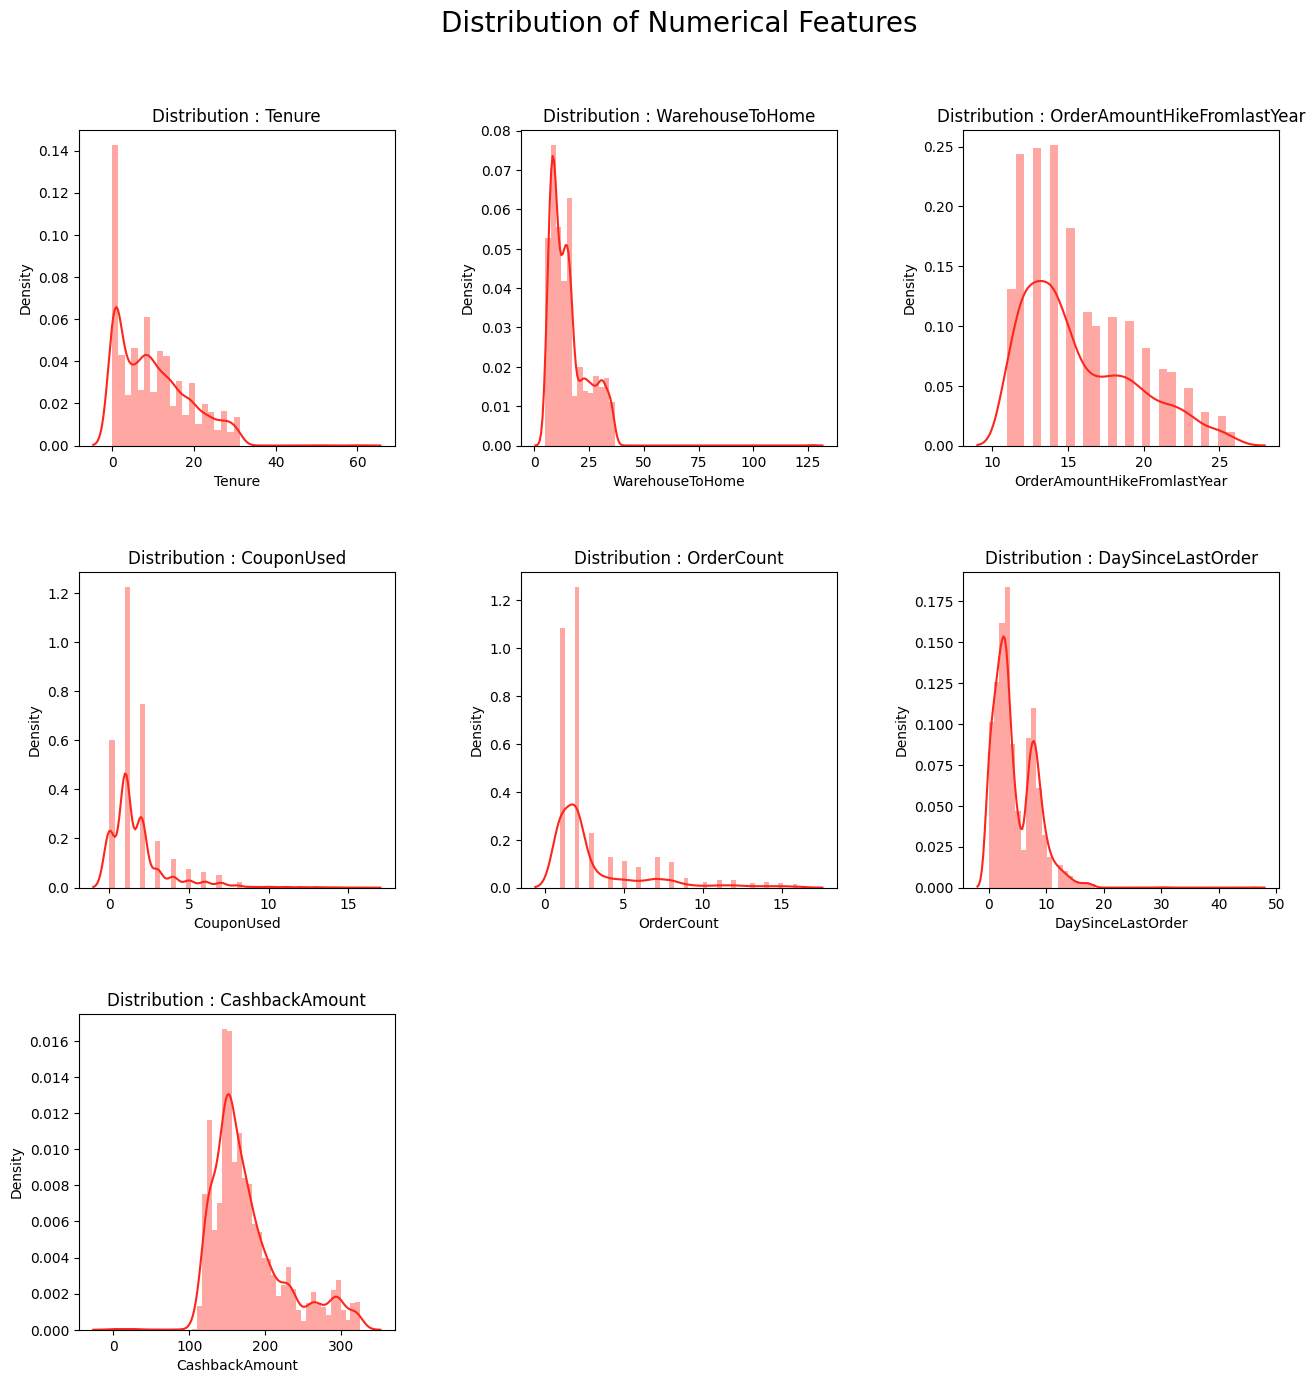

In [37]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15)) # Adjust number of rows and cols
fig.suptitle('Distribution of Numerical Features', fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(len(updated_numerical_features)):
    plt.subplot(3,3,i+1) # Adjust number of rows here as well
    sns.distplot(df1[updated_numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + updated_numerical_features[i]
    plt.title(title)

# Hide any unused subplots
for i in range(len(updated_numerical_features), 9): # 9 is the total number of subplots in a 3x3 grid
    fig.delaxes(ax.flatten()[i])

plt.show()

#### **Density of Features with Target Variable - Churn**

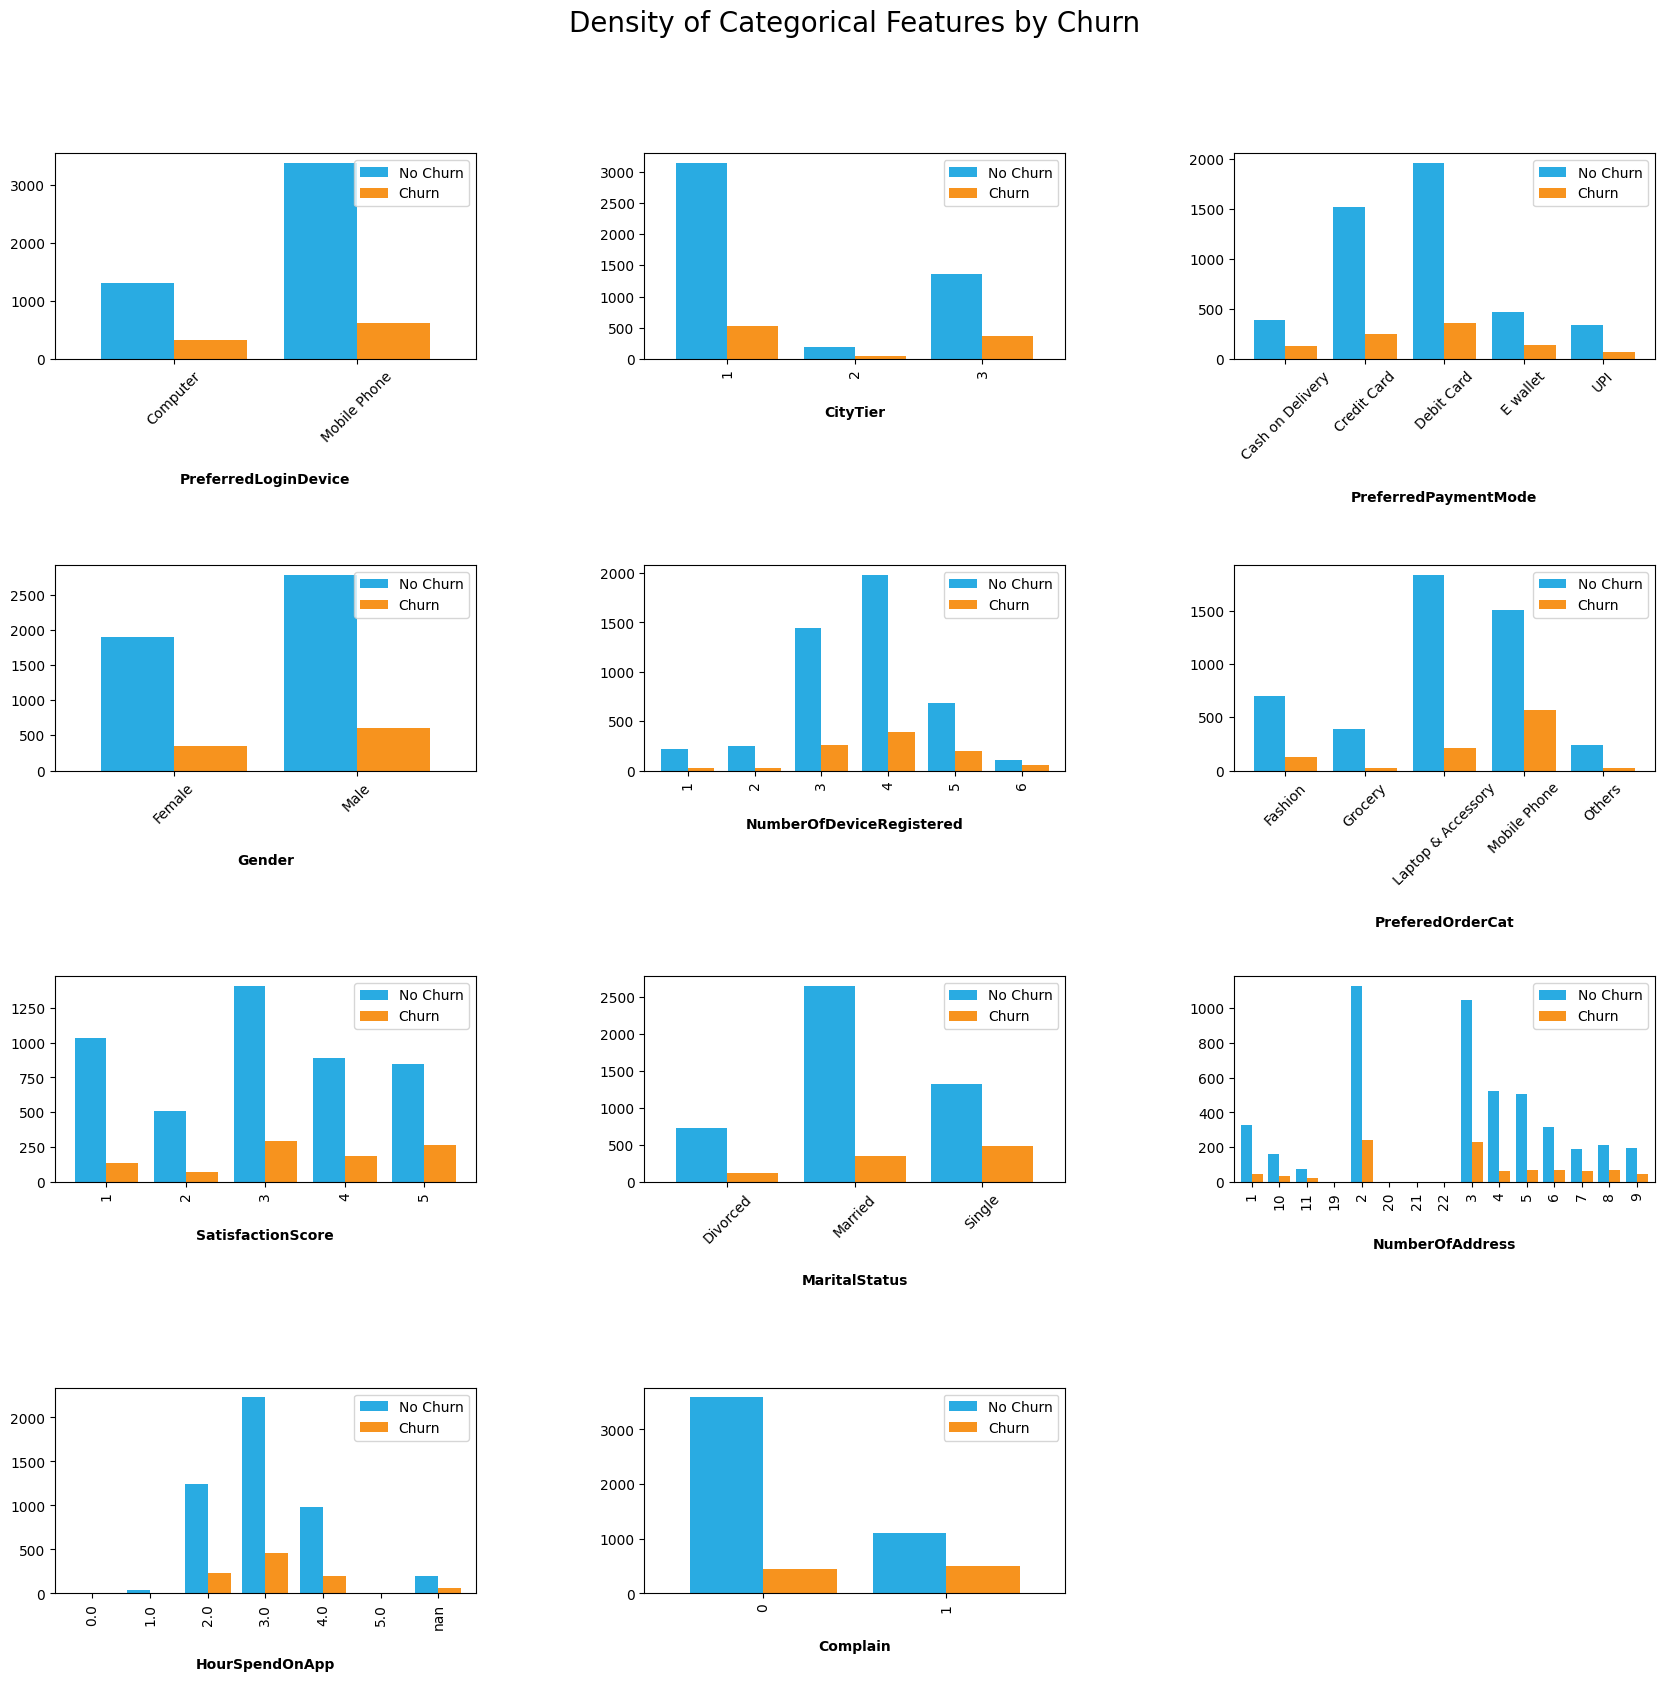

In [38]:
df_c = df1[df1['Churn']=='1'].copy()
df_nc = df1[df1['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Categorical Features by Churn', fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1.0)
ax = ax.flatten()

rotate_90 = ['CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
rotate_45 = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for idx,c in enumerate(updated_categorical_features):
    # Group data by feature and Churn
    grouped = df1.groupby([c, 'Churn'])['Churn'].count().unstack()

    # Rename columns for clarity
    grouped = grouped.rename(columns={'0': 'No Churn', '1': 'Churn'})

    # Plot grouped bar chart with interchanged colors
    grouped.plot(kind='bar', ax=ax[idx], width=0.8, color={'No Churn': '#29ABE2', 'Churn': '#F7931E'})

    ax[idx].legend(loc='upper right')

    # Rotate x-axis labels based on specified lists
    if c in rotate_90:
        ax[idx].tick_params(axis='x', rotation=90)
    elif c in rotate_45:
        ax[idx].tick_params(axis='x', rotation=45)

    ax[idx].set_xlabel(c, labelpad=20, weight='bold')

# Hide any unused subplots
for i in range(len(updated_categorical_features), 12):
    fig.delaxes(ax[i])

plt.show()

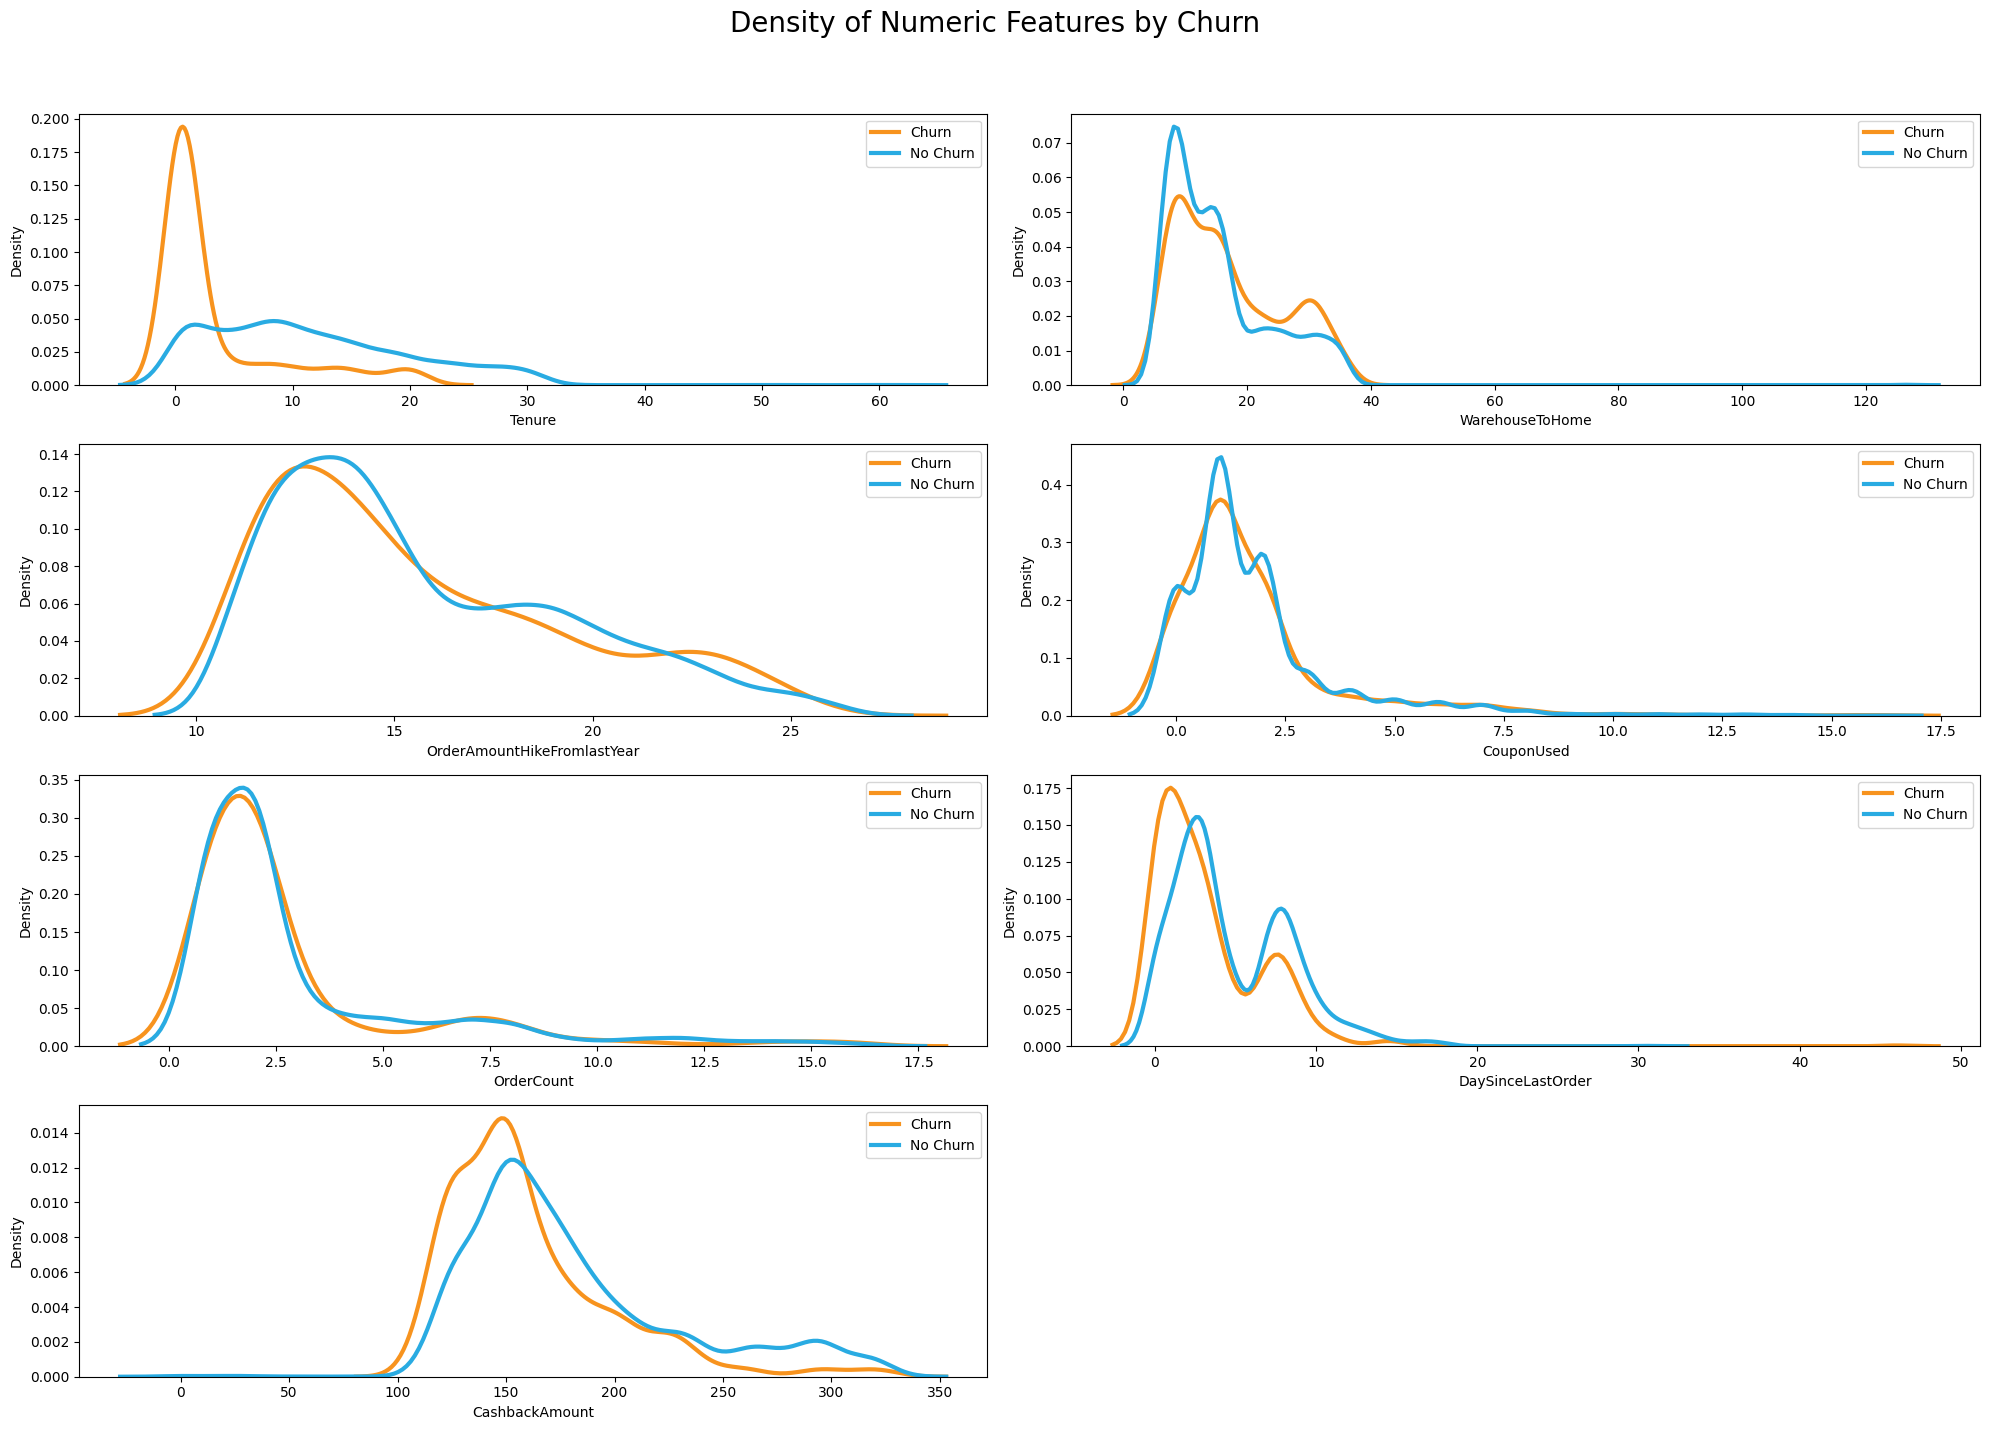

In [39]:
df_c = df[df['Churn'] == 1].copy()
df_nc = df[df['Churn'] == 0].copy()

# Changed the subplot grid to 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

# Define the colors
colors = {'No Churn': '#29ABE2', 'Churn': '#F7931E'}

for idx, c in enumerate(updated_numerical_features):
    sns.kdeplot(df_c[c], linewidth=3, color=colors['Churn'],
                label='Churn', ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth=3, color=colors['No Churn'],
                label='No Churn', ax=ax[idx])

    ax[idx].legend(loc='upper right')

# Hide unused subplots
for i in range(len(updated_numerical_features), 8):
    fig.delaxes(ax[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [40]:
# color palettes
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

#### **Is there any relationship between Gender & Churn?**

In [41]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [42]:
df.groupby("Churn")["Gender"].value_counts()

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: count, dtype: int64

> * Churned females ratio = (348/2246) * 100 = 15.494
* Churned males ratio = (600/3384) * 100 = 17.73

<Axes: xlabel='Gender', ylabel='Average Order Count'>

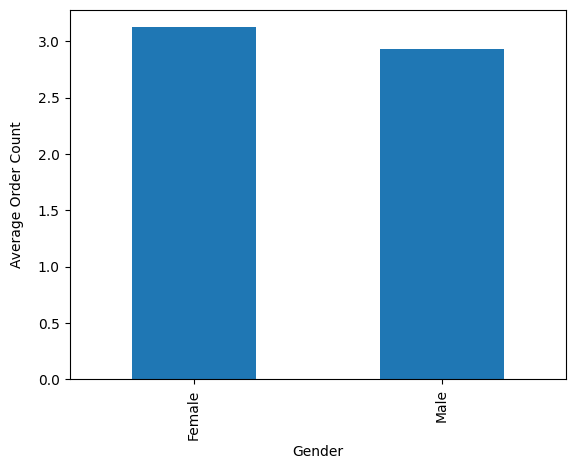

In [43]:
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')
plt.ylabel("Average Order Count", labelpad=10)
gender_orders  # females have more order count avg

> * The average order value is similar between males and females

In [44]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Create subplots with reduced horizontal spacing
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], horizontal_spacing=0.02) # Reduced horizontal spacing

# Order Rate Donut Chart
fig.add_trace(go.Pie(labels=df['Gender'], values=df['OrderCount'],
                     marker=dict(colors=['pink ', 'baby blue']),
                     hole=0.4,  # Create a hole for the donut
                     hovertemplate="<b>Gender: %{label}</b><br>Order Count: %{value}<extra></extra>"),
              row=1, col=1)

# Churn Rate Donut Chart
fig.add_trace(go.Pie(labels=df['Gender'], values=df['Churn'],
                     marker=dict(colors=['pink ', 'baby blue']),
                     hole=0.4,  # Create a hole for the donut
                     hovertemplate="<b>Gender: %{label}</b><br>Churn Count: %{value}<extra></extra>"),
              row=1, col=2)

# Update layouts
fig.update_layout(
    title_text="Order and Churn Rate by Gender",
    title_x=0.5,
    annotations=[dict(text='Order Rate', x=0.18, y=0.5, font_size=14, showarrow=False),
                 dict(text='Churn Rate', x=0.82, y=0.5, font_size=14, showarrow=False)],
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()

> *   Males are more likely to churn, with 63.3% of churned customers being male
*   The company should consider increasing products that appeal specifically to male interests
*   Need to investigate other factors contributing to the high churn rate among male customers





#### **Which MartialStatus has the highest Churn rate?**

In [45]:
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: count, dtype: int64

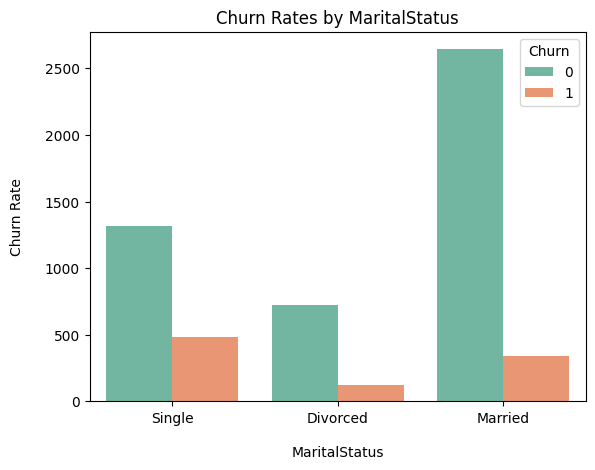

In [46]:
sns.countplot(x='MaritalStatus', hue='Churn', data=df, palette='Set2')
plt.title("Churn Rates by MaritalStatus")
plt.xlabel("MaritalStatus", labelpad=15)
plt.ylabel("Churn Rate", labelpad=15)
plt.rcParams['xtick.major.pad'] = 5  # Adjust the value as needed
plt.show()

> *   The married segment is the highest customer segment for the company
*   The company should consider catering to both single and married customers
*   Single customers are more likely to churn from the app. Therefore, it is important to address the needs and preferences of single customers to reduce churn


#### **Which CityTier has higher Tenure and OrderCount?**

In [47]:
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max'])
df_grouped_tenure

mean   max
CityTier            
1        10.53 51.00
2        11.17 31.00
3         9.36 61.00

In [48]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

mean   max
CityTier            
1         2.95 16.00
2         2.58 13.00
3         3.19 16.00

> *   Citytier 2 has the highest tenure rate but the tenure rate does not seen to be a strong factor
*   Citytier 3 has the highest order average but it not to be a strong factor in the customer churning

#### **Does customer with high SatisfactionScore have high HourSpendOnApp?**

In [49]:
# plot
fig = px.histogram(df1, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)

fig.update_layout(margin=dict(r=100))
fig.show()

> * People with lower satisfaction scores tend to spend less time on the app compared to those with a satisfaction score of 5
* However, there does not appear to be a strong correlation between satisfaction scores and the amount of time people spend on the app

#### **Which CityTier has the most HourSpendOnApp?**

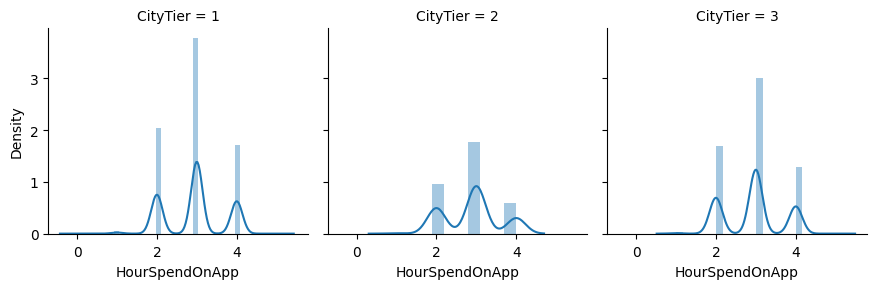

In [50]:
g = sns.FacetGrid(df1.sort_values('CityTier'), col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')

> * CityTier 1 has the most spended hours on the app

#### **What is the relation between NumberOfAddress and CityTier within the churn segment?**

In [51]:
df.groupby("CityTier")["NumberOfAddress"].value_counts()

CityTier  NumberOfAddress
1         2                  871
          3                  832
          4                  397
          5                  377
          6                  247
          1                  228
          8                  187
          7                  173
          9                  150
          10                 129
          11                  71
          22                   1
          21                   1
          20                   1
          19                   1
2         2                   61
          3                   43
          5                   30
          1                   23
          6                   21
          4                   16
          10                  13
          8                   10
          7                   10
          11                   9
          9                    6
3         2                  437
          3                  403
          4                  175
          5                  164
          1                  120
          6                  114
          8                   83
          9                   83
          7                   73
          10                  52
          11                  18
Name: count, dtype: int64

<Axes: xlabel='CityTier', ylabel='NumberOfAddress'>

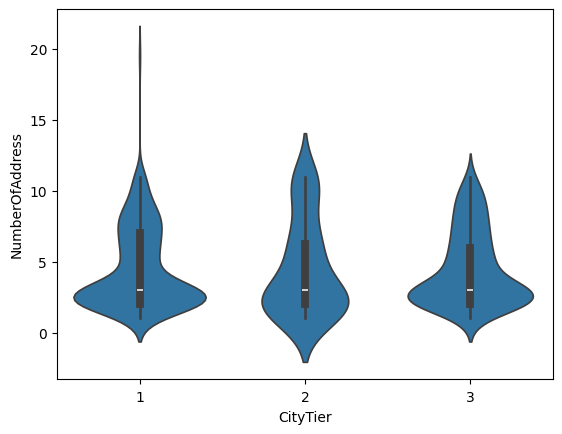

In [52]:
# Violin plots

sns.violinplot(x='CityTier', y='NumberOfAddress', data=df[df['Churn']==1])

> * **Negative Correlation:** There is a negative correlation between CityTier and NumberOfAddress.
* **Higher CityTiers:** Higher CityTiers are linked to a lower average NumberOfAddress and a more concentrated address distribution.
* **Larger Cities:** Customers in larger cities (CityTier 1) tend to have more addresses on average compared to those in smaller cities or towns in lower tiers.
* **Impact of Locality:** The relationship indicates that address density and locality type (metro vs smaller cities vs towns) influence the number of addresses customers have across different city types.

#### **What is the relation between Complain and DaySinceLastOrder?**

In [53]:
# Pearson correlation
df[['DaySinceLastOrder', 'Complain']].corr()

DaySinceLastOrder  Complain
DaySinceLastOrder               1.00     -0.04
Complain                       -0.04      1.00

In [54]:
fig = px.scatter(df, x='DaySinceLastOrder', y='Complain', facet_col='Churn')
fig.update_layout(hovermode='closest')
fig.show()



> * There is a weak negative correlation relationship between complaining and the number of days since the last order.
* As the number of days since the last order increases, the tendency to complain weakly decreases.



#### **Is there a relationship between PreferredLoginDevice and churn?**

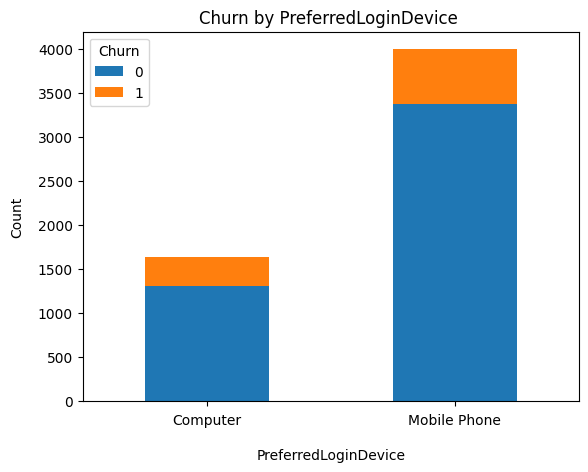

In [55]:
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice', labelpad=15)
plt.ylabel('Count', labelpad=10)
plt.xticks(rotation=0)

# Show the plot
plt.show()

> Mobile phone users are likely to churn. This could indicate potential issues with the user experience on the mobile app version


#### **What is the distance between Warehouse to Customer House in different city tier?**

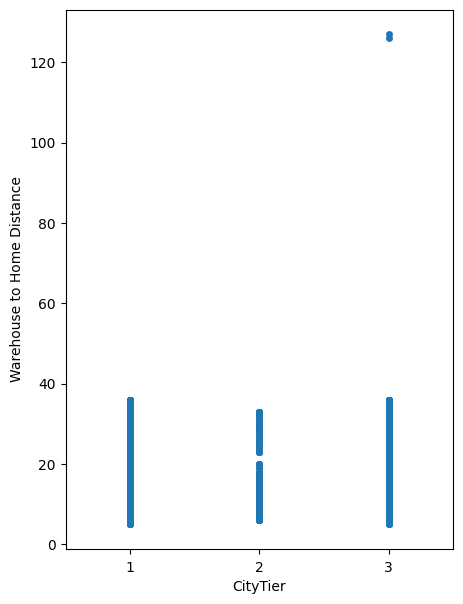

In [56]:
df2 = df.copy()

df2['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df2, jitter = False)
plt.ylabel('Warehouse to Home Distance');

> * The distance from the warehouse to customers' homes is similar across all city tiers
* This implies that the company has established warehouses in lower-tier cities as well



#### **Does different citytiers has different prefered products?**

In [57]:
fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=green_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()

> Laptop & Accesory and Mobile Phones are the preferred category for all the city tiers



#### **What is the preferred payment mode for different CityTiers?**

In [58]:
df1['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [59]:
df1.groupby('CityTier')[['PreferredPaymentMode']].value_counts()

CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1382
          Cash on Delivery         366
          UPI                      242
2         UPI                      114
          Debit Card                62
          Credit Card               50
          Cash on Delivery          16
3         E wallet                 614
          Debit Card               576
          Credit Card              342
          Cash on Delivery         132
          UPI                       58
Name: count, dtype: int64

In [60]:
fig=px.histogram(df1,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",color_discrete_sequence=blue_palette,text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

> * Preferred payment method for CityTier '1': Debit Card
* Preferred payment method for CityTier '2': UPI
* Preferred payment method for CityTier '3': E-wallet

#### **Which CityTier has the highest OrderCount?**

In [61]:
df1.groupby('CityTier')[['OrderCount']].sum()

OrderCount
CityTier            
1           10298.00
2             615.00
3            5246.00

In [62]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='City Tier',
)

fig.update_yaxes(showticklabels=False)
fig.show()

> * CityTier '1' has highest order count with 10298 orders



#### **Does the percentage increase in order amount from last year affect churn rate?**

In [63]:
df1['OrderAmountHikeFromlastYear'].value_counts()

OrderAmountHikeFromlastYear
14.00    750
13.00    741
12.00    728
15.00    542
11.00    391
16.00    333
18.00    321
19.00    311
17.00    297
20.00    243
21.00    190
22.00    184
23.00    144
24.00     84
25.00     73
26.00     33
Name: count, dtype: int64

In [64]:
df1.groupby('OrderAmountHikeFromlastYear')['Churn'].count()

OrderAmountHikeFromlastYear
11.00    391
12.00    728
13.00    741
14.00    750
15.00    542
16.00    333
17.00    297
18.00    321
19.00    311
20.00    243
21.00    190
22.00    184
23.00    144
24.00     84
25.00     73
26.00     33
Name: Churn, dtype: int64

In [65]:
comp_ten = df1.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#1f77b4", "#d62728"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()



> * The graph illustrates that as the percentage of orders from the last year increases, the churn rate decreases.
* **Positive Effect:** The variable "OrderAmountHikeFromLastYear" has a positive effect on reducing churn rates.
* **Focus Area:** Pay particular attention when the percentage of order increase is between 12% and 14%, as this range has significant implications for churn.



#### **Relation between Complain and DaySinceLastOrder for churned customers**

In [66]:
df_c.groupby('Complain')[['DaySinceLastOrder']].sum()

DaySinceLastOrder
Complain                   
0                   1313.00
1                   1580.00

In [67]:
fig = px.histogram(df2, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain" , color_discrete_sequence = ['#BA1F33','#3A506B'],
                   marginal="box") # or violin, rug)

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

> * Customers who did not make a complaint have a higher DaySinceLastOrder.
* **Outlier Issue:** This observation is based on only one customer, which may be an outlier. Removing this outlier would show that customers with no complaints actually have a lower DaySinceLastOrder

#### **Is there a relationship between preferred order category and gender?**

In [68]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(df1.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()


fig = px.histogram(ordercat_churnrate, x='PreferedOrderCat', y = 'count',color='Gender', barmode='group',color_discrete_sequence=pie_palette,title="<b>"+'Prefered Order Category Vs Gender', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()


> * Top 2 Preferred Category For Males -> [Others, Mobile Phone]
* Top 2 Preferred Category For Females -> [Grocery, Fashion]

#### **Do customers who used more coupons have lower churn rates?**

In [69]:
# Group and count by 'CouponUsed' and 'Churn'
coupoun_churnrate = pd.DataFrame(df1.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'count',color='Churn', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='count',
)
fig.show()

> The graph indicates that churn decreases as the number of coupons used increases

#### **Is there a connection between satisfaction score and number of orders in the past month?**

In [70]:
df1.groupby('SatisfactionScore')[['OrderCount']].count()

OrderCount
SatisfactionScore            
1                        1120
2                         558
3                        1618
4                        1020
5                        1056

In [71]:
fig = px.box(df1, y="OrderCount", x='SatisfactionScore', color="SatisfactionScore", title="<b>"+'SatisfactionScore Vs OrderCount',
             boxmode="overlay", points='all')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='SatisfactionScore',
yaxis_title='OrderCount',
)
fig.show()

> SatisfactionScore doesn't have affect on OrderCount

#### **Relation between CashbackAmount and Order counts within churn?**

In [72]:
df_c.groupby(['OrderCount','CashbackAmount'])[['Churn']].count()

Churn
OrderCount CashbackAmount       
1.00       110.09              2
           110.81              2
           110.91              2
           111.02              2
           111.18              2
...                          ...
15.00      203.12              2
           295.45              2
16.00      152.43              2
           228.12              2
           320.45              2

[461 rows x 1 columns]

In [73]:
fig = px.histogram(df1, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

> The graphs indicate no relationship between cashback amount and order count, but there is a positive relationship between cashback amount and churn rate



#### **Are customers who complained more likely to churn?**

In [74]:
df1.groupby('Complain')[['Churn']].count()

Churn
Complain       
0          4026
1          1604

In [75]:
comp_churn = pd.DataFrame(df1.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()
print(comp_churn)

comp_churn['Complain'].replace('0' , 'No Complain' , inplace = True)
comp_churn['Complain'].replace('1' , 'Complain' , inplace = True)
comp_churn['Churn'].replace('0' , 'No Churn' , inplace = True)
comp_churn['Churn'].replace('1' , 'Churn' , inplace = True)
print(comp_churn)

# Tree map
fig = px.treemap(comp_churn, path=[px.Constant("all"), 'Complain', 'Churn'], values='count' , color_discrete_sequence=["#2F4B26" , '#FF0000'],title="<b>"+'Complain Vs Churn')
fig.update_traces(textinfo="label+percent parent+value" ,root_color="lightgrey")
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

# red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']
# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.show()

  Complain Churn  count
0        0     0   3586
1        0     1    440
2        1     0   1096
3        1     1    508
      Complain     Churn  count
0  No Complain  No Churn   3586
1  No Complain     Churn    440
2     Complain  No Churn   1096
3     Complain     Churn    508


> * Complaints do not appear to affect churn significantly, as the graph indicates that 68% of customers who made complaints did not churn



###**Distributions Insights of the Features**

* **Tenure:** Customers with longer tenure are less likely to churn, as a longer tenure often indicates higher levels of satisfaction
* **CityTier:** Churn rate appears consistent across different city tiers, indicating that city tier is not a significant predictor of churn
* **WarehouseToHome:** Shorter warehouse-to-home distances have lower churn rates, and faster deliveries enhance customer satisfaction
* **HourSpendOnApp:** Increased time spent on the app correlates with lower churn, indicating strong engagement
* **NumberOfDeviceRegistered:** Higher number of registered devices is associated with lower churn, as access across multiple devices improves user convenience
* **SatisfactionScore:** Higher satisfaction scores are strongly correlated with lower churn rates, making it a critical driver of customer retention
* **NumberOfAddress:** Churn rates exhibit a slight downward trend as the number of addresses increases, suggesting that customers with more addresses tend to be more loyal
* **Complain:** More complaints associate with higher churn
* **OrderAmountHikeFromLastYear:** Big spenders from last year are less likely to churn. It is beneficial to retain big customers
* **CouponUsed:** Coupon usage correlates with lower churn. Coupons enhance loyalty
* **OrderCount:** Higher order counts associate with lower churn. Frequent usage builds habits
* **DaySinceLastOrder:** Longer interval since the last order correlates with higher churn, making recency a strong predictor

#**Data Preprocessing**


*   Clean the data by handling missing values, converting variables to appropriate data types (encoding), handling outliers, handling imbalanced data and addressing any data quality issues.

*   Splitting the data for Model Training



### **One Hot Encoding**

In [76]:
categorical_features

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [77]:
#Before One Hot Encoding
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [78]:
for col in categorical_features:
        if df[col].dtype == 'object':
            # Convert categorical column to one-hot encoded representation
            encoded_cols = pd.get_dummies(df[col], prefix=col)
            # Concatenate one-hot encoded columns
            df = pd.concat([df.drop(col, axis=1), encoded_cols], axis=1)

In [79]:
#After One Hot Encoding
df.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

### **Handling Missing Values**

<Axes: >

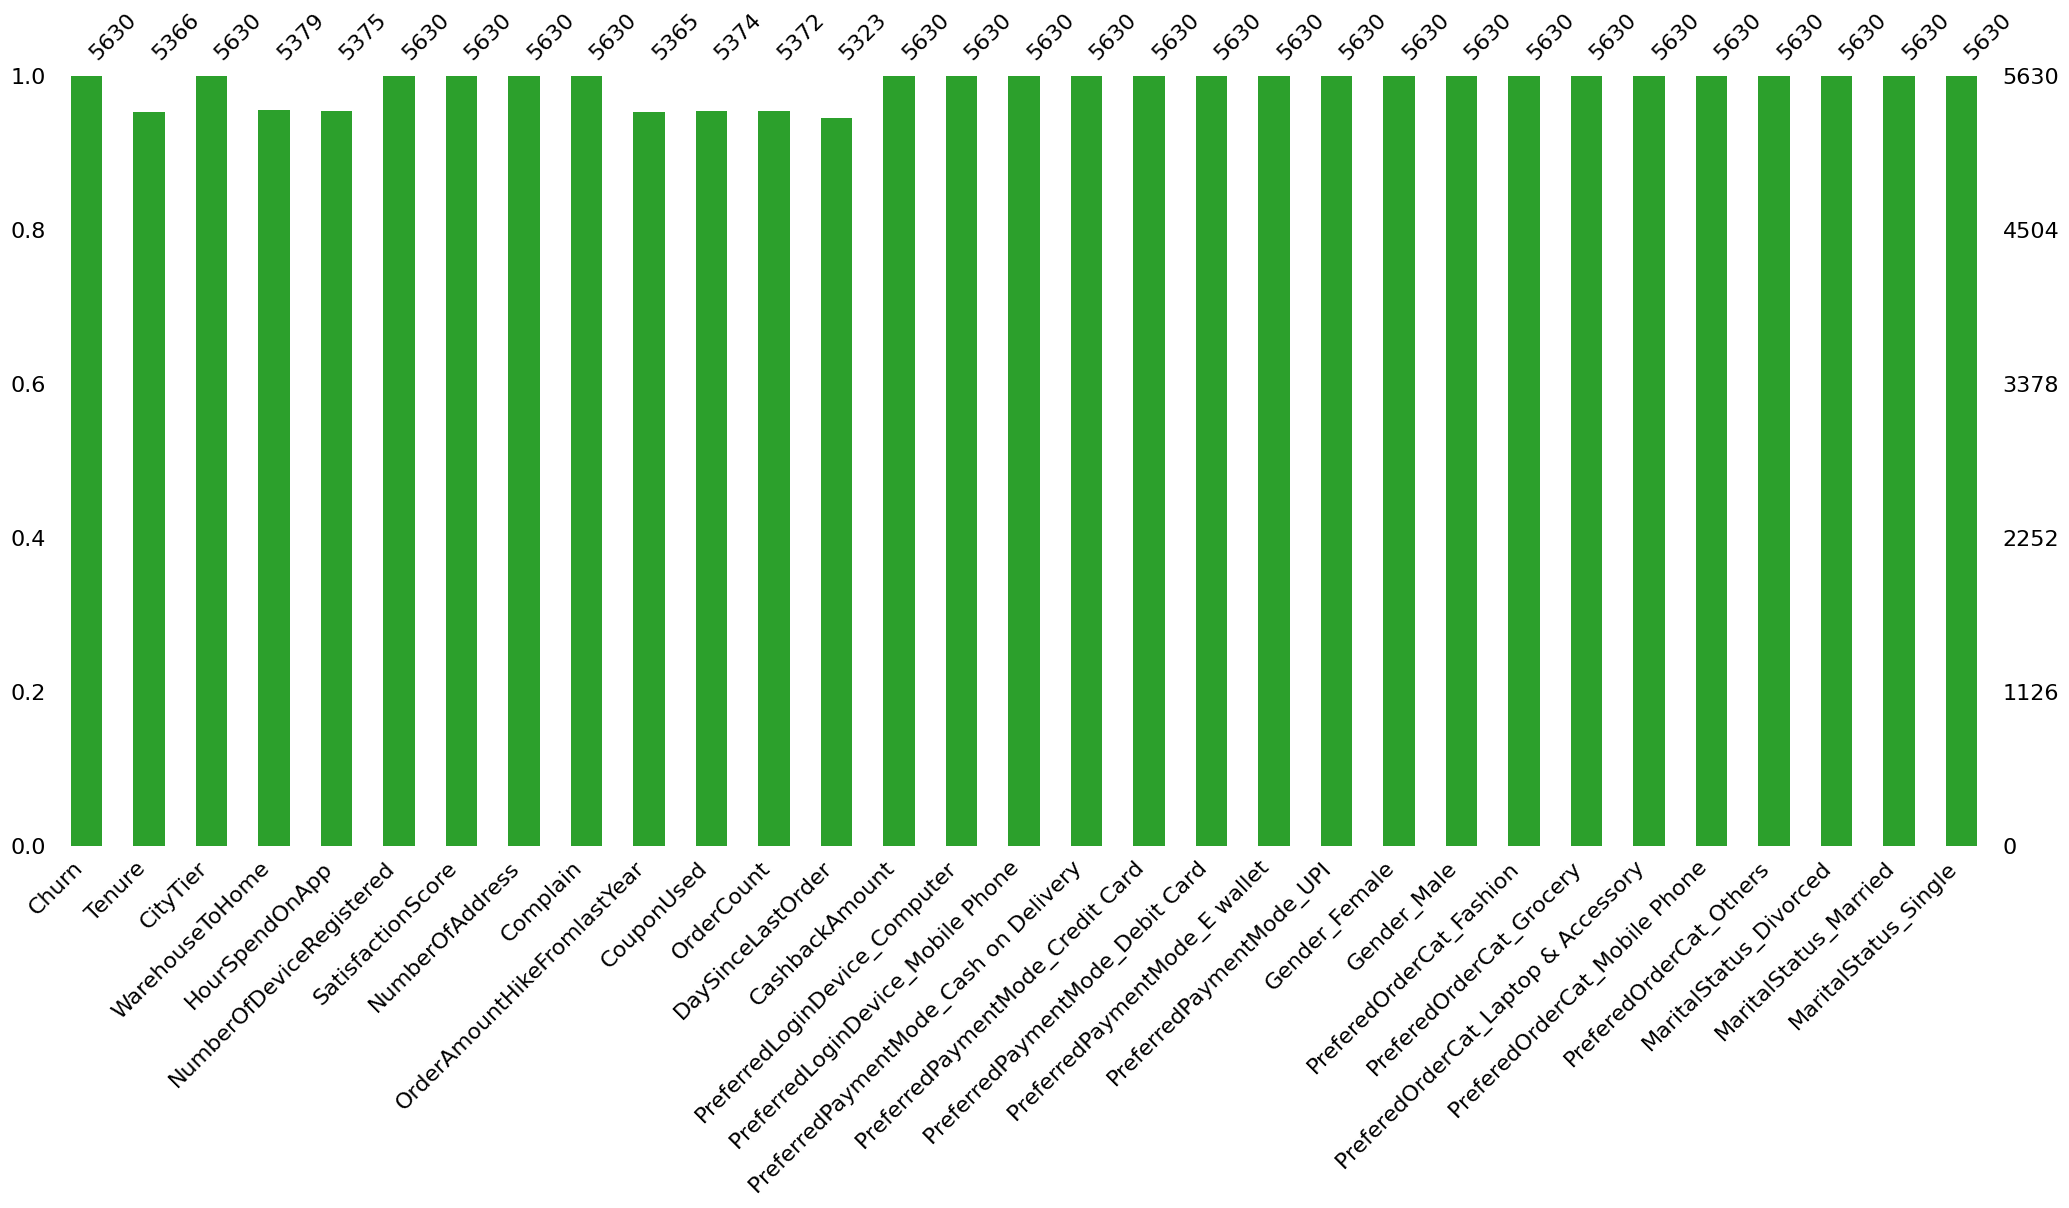

In [80]:
msno.bar(df , color="tab:green")

>* In our dataset, the proportion of missing values in each column is less than 6%
* This low percentage of missing data suggests that the missing values are not substantial enough to significantly impact the model's performance
* Thus, we can impute these missing values with appropriate methods
* The columns/attributes with missing values are:
  1. Tenure
  2. WarehouseToHome
  3. HoursSpendOnApp
  4. OrderAmountHikeFromlastYear
  5. CouponUsed
  6. OrderCount
  7. DaySinceLastOrder





In [81]:
df[numerical_features].columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

#### **Handling Numerical Columns**

In [82]:
df[numerical_features].head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0    4.00             6.00            3.00                         3   
1     NaN             8.00            3.00                         4   
2     NaN            30.00            2.00                         4   
3    0.00            15.00            2.00                         4   
4    0.00            12.00             NaN                         3   

   SatisfactionScore  NumberOfAddress  OrderAmountHikeFromlastYear  \
0                  2                9                        11.00   
1                  3                7                        15.00   
2                  3                6                        14.00   
3                  5                8                        23.00   
4                  5                3                        11.00   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0        1.00        1.00               5.00          159.93  
1        0.00        1.00               0.00          120.90  
2        0.00        1.00               3.00          120.28  
3        0.00        1.00               3.00          134.07  
4        1.00        1.00               3.00          129.60

In [83]:
#Impute numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numerical_features] = numeric_imputer.fit_transform(df[numerical_features])

#### **Random Forest Iterative Imputer**

In [84]:
#Random Forest Iterative Imputer for the entire DataFrame
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=None))
df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

### **Handling Outliers**

In [85]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [86]:
# Passing columns containing outliers to handle_outliers function
cols_outliers = ['Tenure', 'WarehouseToHome', 'NumberOfAddress','DaySinceLastOrder', 'HourSpendOnApp',
                 'NumberOfDeviceRegistered', 'CouponUsed', 'OrderCount', 'CashbackAmount']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0   1.00    4.00      3.00             6.00            3.00   
1   1.00   10.19      1.00             8.00            3.00   
2   1.00   10.19      1.00            30.00            2.00   
3   1.00    0.00      3.00            15.00            2.00   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                      3.00               2.00             9.00      1.00   
1                      4.00               3.00             7.00      1.00   
2                      4.00               3.00             6.00      1.00   
3                      4.00               5.00             8.00      0.00   

   OrderAmountHikeFromlastYear  ...  Gender_Female  Gender_Male  \
0                        11.00  ...           1.00         0.00   
1                        15.00  ...           0.00         1.00   
2                        14.00  ...           0.00         1.00   
3                        23.00  ...           0.00         1.00   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                      0.00                      0.00   
1                      0.00                      0.00   
2                      0.00                      0.00   
3                      0.00                      0.00   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                 1.00                           0.00   
1                                 0.00                           1.00   
2                                 0.00                           1.00   
3                                 1.00                           0.00   

   PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                     0.00                    0.00                   0.00   
1                     0.00                    0.00                   0.00   
2                     0.00                    0.00                   0.00   
3                     0.00                    0.00                   0.00   

   MaritalStatus_Single  
0                  1.00  
1                  1.00  
2                  1.00  
3                  1.00  

[4 rows x 31 columns]

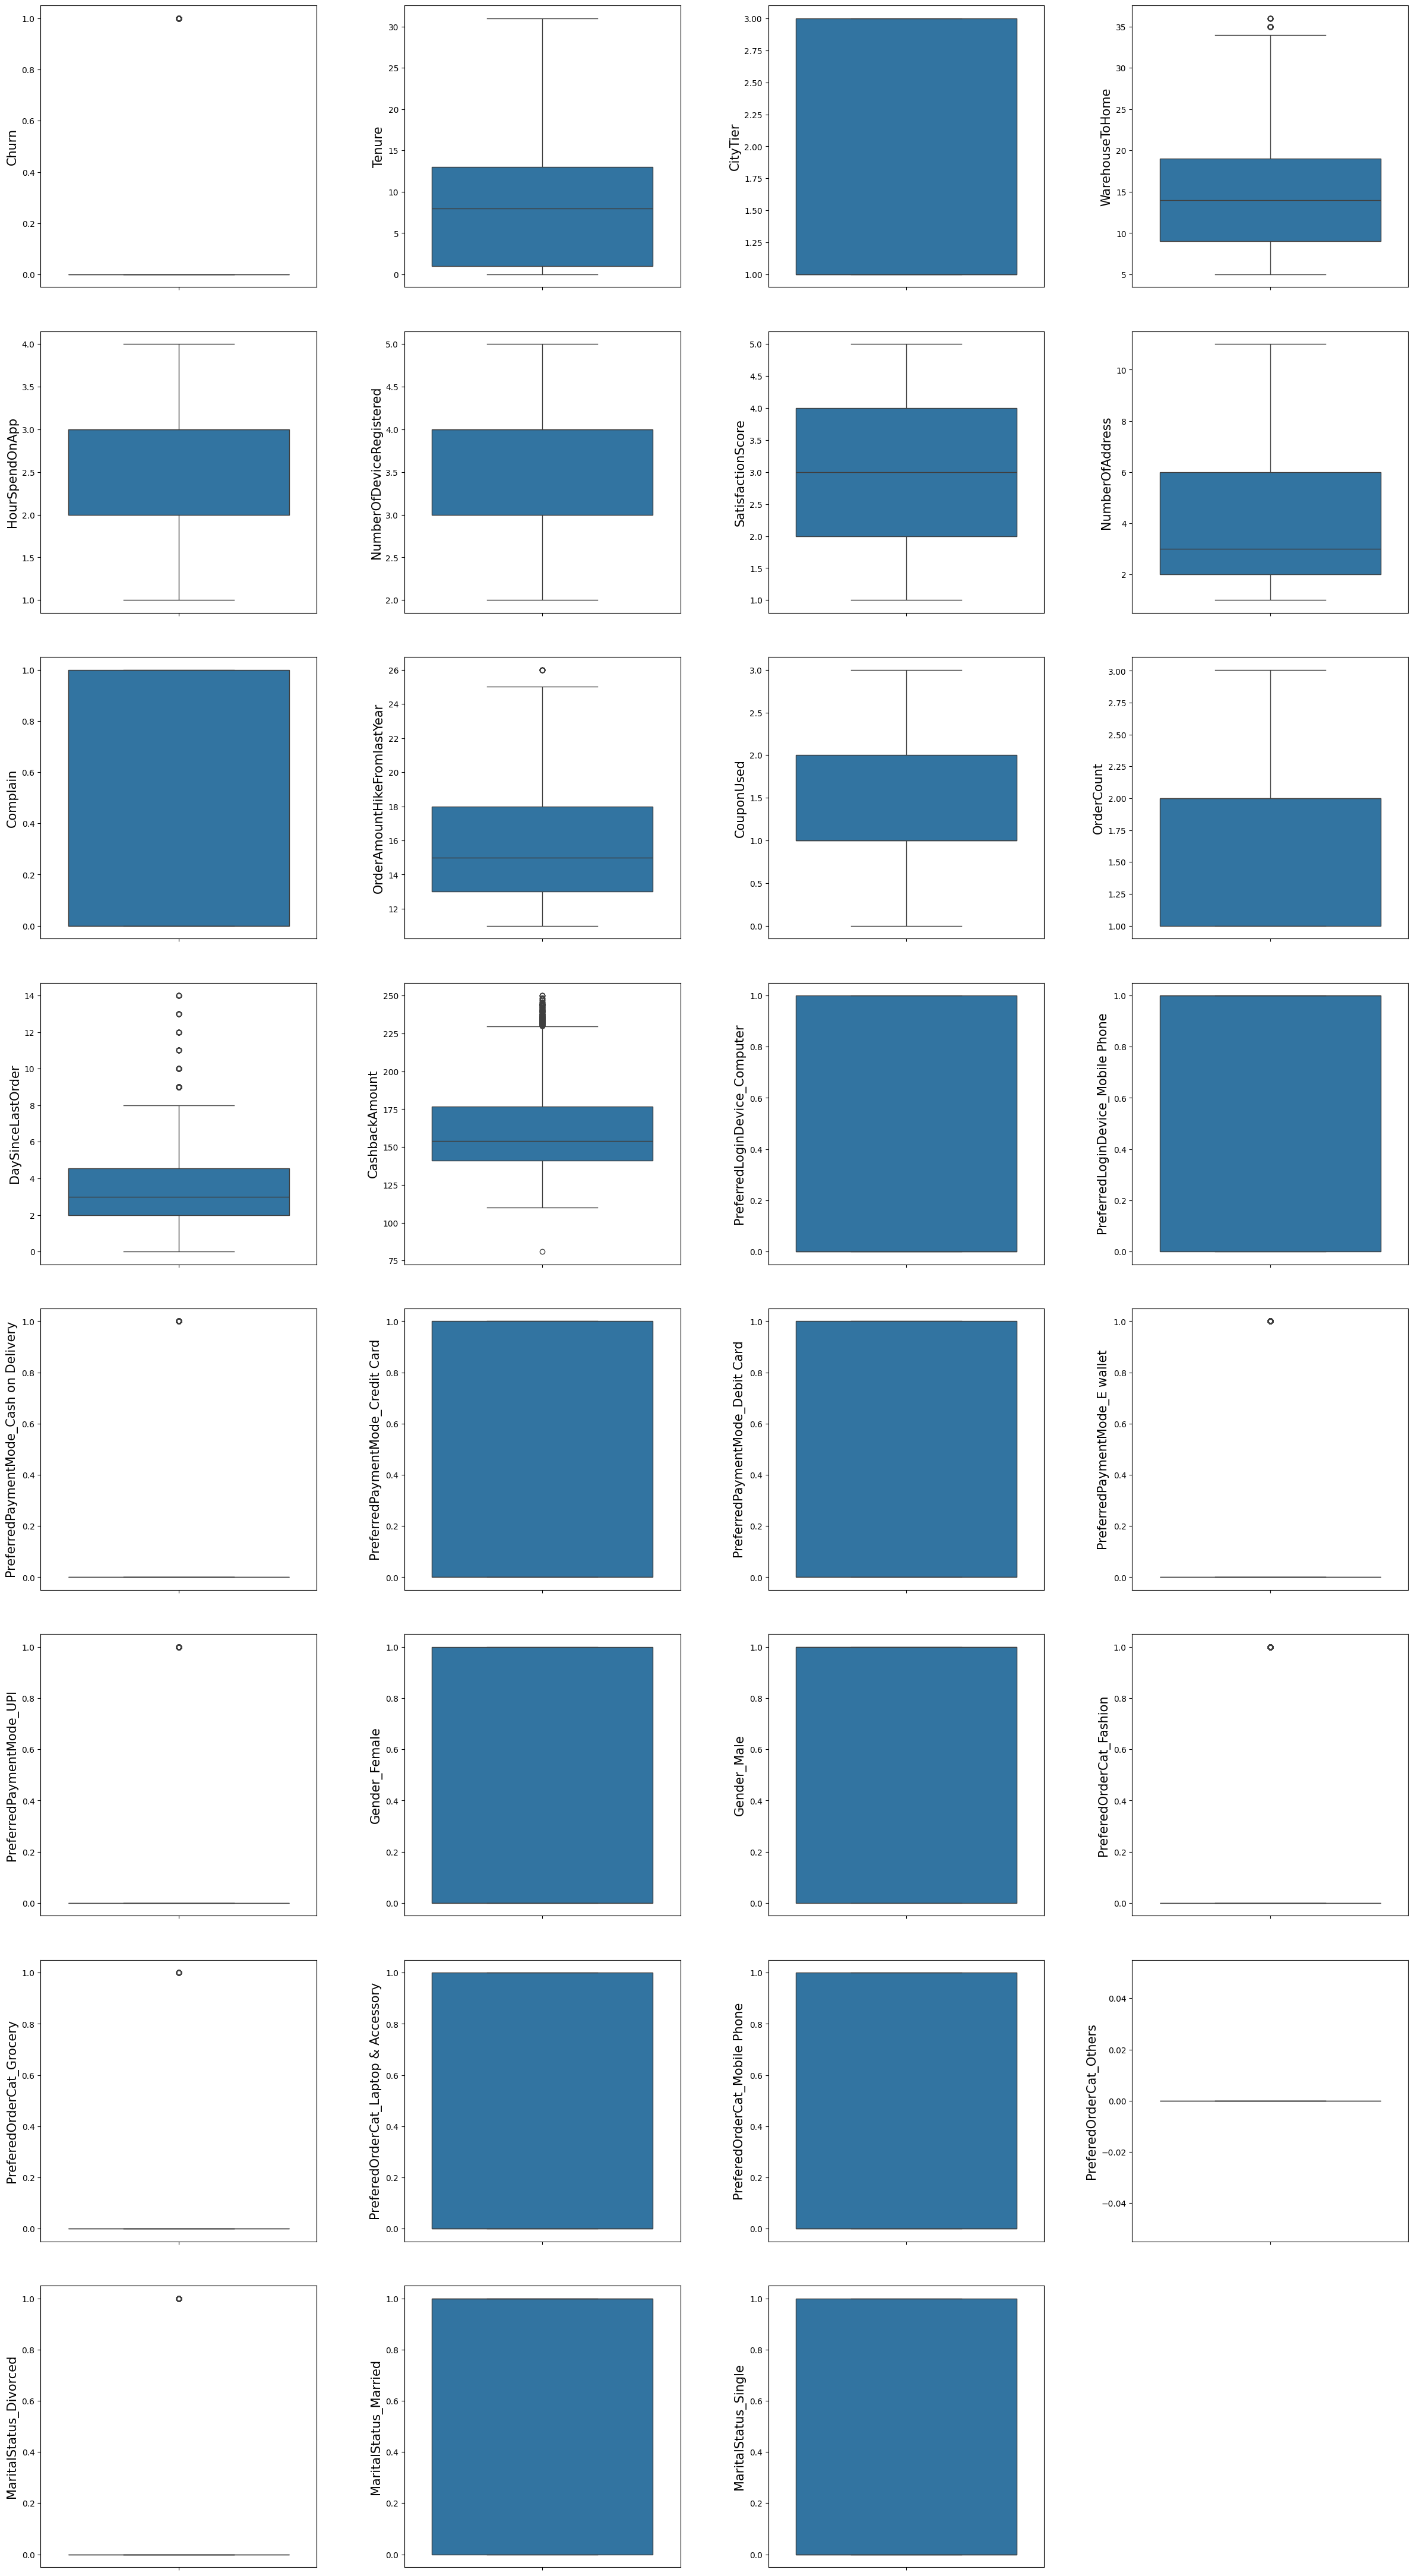

In [87]:
fig = plt.figure(figsize=(25,50))
for i in range(len(df.columns)):
    ax = fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i], ax=ax)
    ax.set_ylabel(df.columns[i], fontsize=15)

plt.tight_layout(pad=5.0)
plt.show()

> The columns containing fewer outliers are trimmed, while some columns with many outliers still have the outliers. This ensures that the concerns regarding outliers are addressed without substantial loss of valuable data.

### **Splitting the Data**

In [88]:
# Split model into training and test set
X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of X_train is: (2952, 30)
The shape of X_test is: (738, 30)
The shape of y_train is: (2952,)
The shape of y_test is: (738,)


### **Handling Imbalanced Data**

In [89]:
corr_matrix = df.corr()
corr_matrix

Churn  Tenure  CityTier  \
Churn                                   1.00   -0.33      0.06   
Tenure                                 -0.33    1.00     -0.06   
CityTier                                0.06   -0.06      1.00   
WarehouseToHome                         0.08   -0.01      0.02   
HourSpendOnApp                          0.01   -0.03     -0.00   
NumberOfDeviceRegistered                0.10   -0.03      0.02   
SatisfactionScore                       0.14   -0.06     -0.01   
NumberOfAddress                         0.03    0.24     -0.03   
Complain                                0.26   -0.03      0.03   
OrderAmountHikeFromlastYear            -0.01    0.00     -0.07   
CouponUsed                             -0.01    0.01     -0.00   
OrderCount                             -0.04    0.09     -0.02   
DaySinceLastOrder                      -0.20    0.12      0.01   
CashbackAmount                         -0.17    0.26      0.16   
PreferredLoginDevice_Computer           0.05   -0.02      0.01   
PreferredLoginDevice_Mobile Phone      -0.05    0.02     -0.01   
PreferredPaymentMode_Cash on Delivery   0.07    0.02     -0.04   
PreferredPaymentMode_Credit Card       -0.04   -0.05     -0.18   
PreferredPaymentMode_Debit Card        -0.05    0.05     -0.12   
PreferredPaymentMode_E wallet           0.06    0.00      0.52   
PreferredPaymentMode_UPI                0.00   -0.04     -0.04   
Gender_Female                          -0.03    0.06      0.03   
Gender_Male                             0.03   -0.06     -0.03   
PreferedOrderCat_Fashion               -0.04    0.17      0.05   
PreferedOrderCat_Grocery               -0.05    0.23      0.00   
PreferedOrderCat_Laptop & Accessory    -0.18    0.08      0.27   
PreferedOrderCat_Mobile Phone           0.22   -0.25     -0.30   
PreferedOrderCat_Others                  NaN     NaN       NaN   
MaritalStatus_Divorced                 -0.03    0.03      0.00   
MaritalStatus_Married                  -0.14    0.09     -0.03   
MaritalStatus_Single                    0.17   -0.12      0.03   

                                       WarehouseToHome  HourSpendOnApp  \
Churn                                             0.08            0.01   
Tenure                                           -0.01           -0.03   
CityTier                                          0.02           -0.00   
WarehouseToHome                                   1.00            0.02   
HourSpendOnApp                                    0.02            1.00   
NumberOfDeviceRegistered                          0.00            0.26   
SatisfactionScore                                 0.02            0.03   
NumberOfAddress                                   0.02            0.14   
Complain                                          0.01           -0.00   
OrderAmountHikeFromlastYear                       0.05            0.12   
CouponUsed                                        0.02            0.39   
OrderCount                                        0.05            0.42   
DaySinceLastOrder                                 0.05            0.08   
CashbackAmount                                    0.10            0.22   
PreferredLoginDevice_Computer                     0.01           -0.02   
PreferredLoginDevice_Mobile Phone                -0.01            0.02   
PreferredPaymentMode_Cash on Delivery             0.00           -0.02   
PreferredPaymentMode_Credit Card                  0.02            0.01   
PreferredPaymentMode_Debit Card                  -0.03            0.01   
PreferredPaymentMode_E wallet                     0.04            0.03   
PreferredPaymentMode_UPI                         -0.02           -0.04   
Gender_Female                                    -0.01            0.01   
Gender_Male                                       0.01           -0.01   
PreferedOrderCat_Fashion                          0.07           -0.00   
PreferedOrderCat_Grocery                          0.05           -0.09   
Pr

<Axes: >

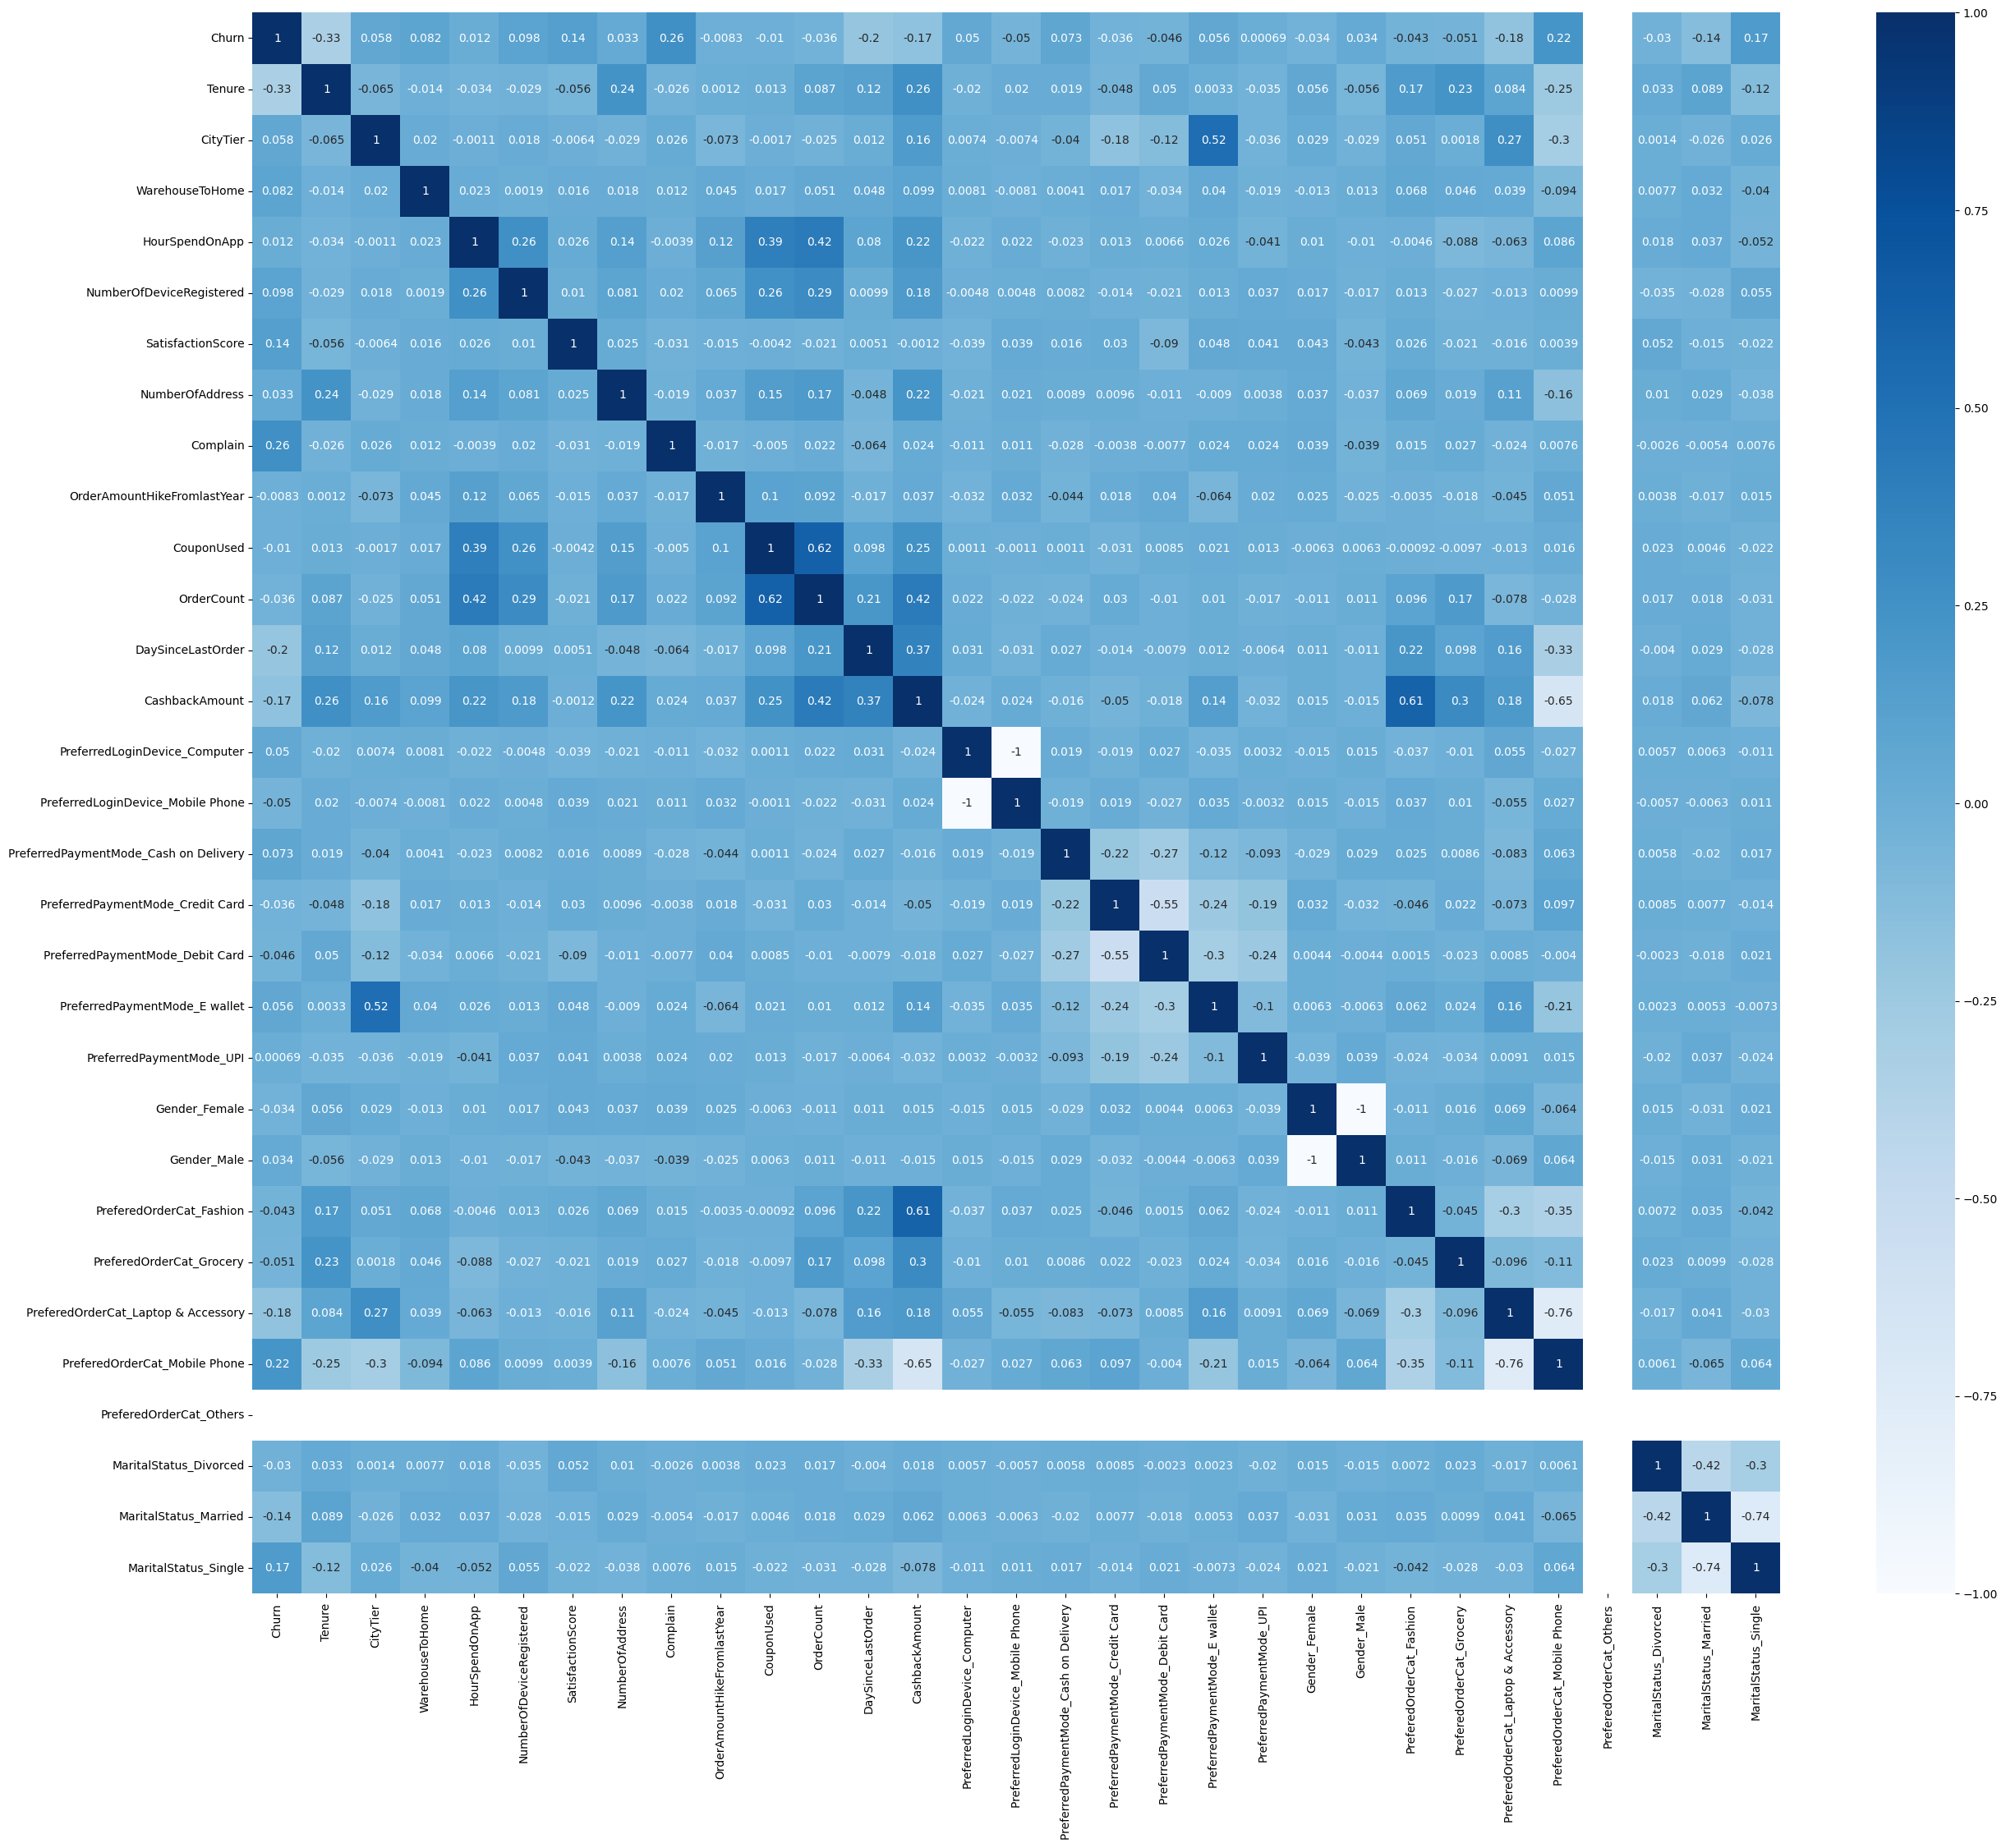

In [90]:
plt.figure(figsize = (30,25))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [91]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                                    1.00
Complain                                 0.26
PreferedOrderCat_Mobile Phone            0.22
MaritalStatus_Single                     0.17
SatisfactionScore                        0.14
NumberOfDeviceRegistered                 0.10
WarehouseToHome                          0.08
PreferredPaymentMode_Cash on Delivery    0.07
CityTier                                 0.06
PreferredPaymentMode_E wallet            0.06
PreferredLoginDevice_Computer            0.05
Gender_Male                              0.03
NumberOfAddress                          0.03
HourSpendOnApp                           0.01
PreferredPaymentMode_UPI                 0.00
OrderAmountHikeFromlastYear             -0.01
CouponUsed                              -0.01
MaritalStatus_Divorced                  -0.03
Gender_Female                           -0.03
OrderCount                              -0.04
PreferredPaymentMode_Credit Card        -0.04
PreferedOrderCat_Fashion                -0.04
PreferredPaymentMode_Debit Card         -0.05
PreferredLoginDevice_Mobile Phone       -0.05
PreferedOrderCat_Grocery                -0.05
MaritalStatus_Married                   -0.14
CashbackAmount                          -0.17
PreferedOrderCat_Laptop & Accessory     -0.18
DaySinceLastOrder                       -0.20
Tenure                                  -0.33
PreferedOrderCat_Others                   NaN
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

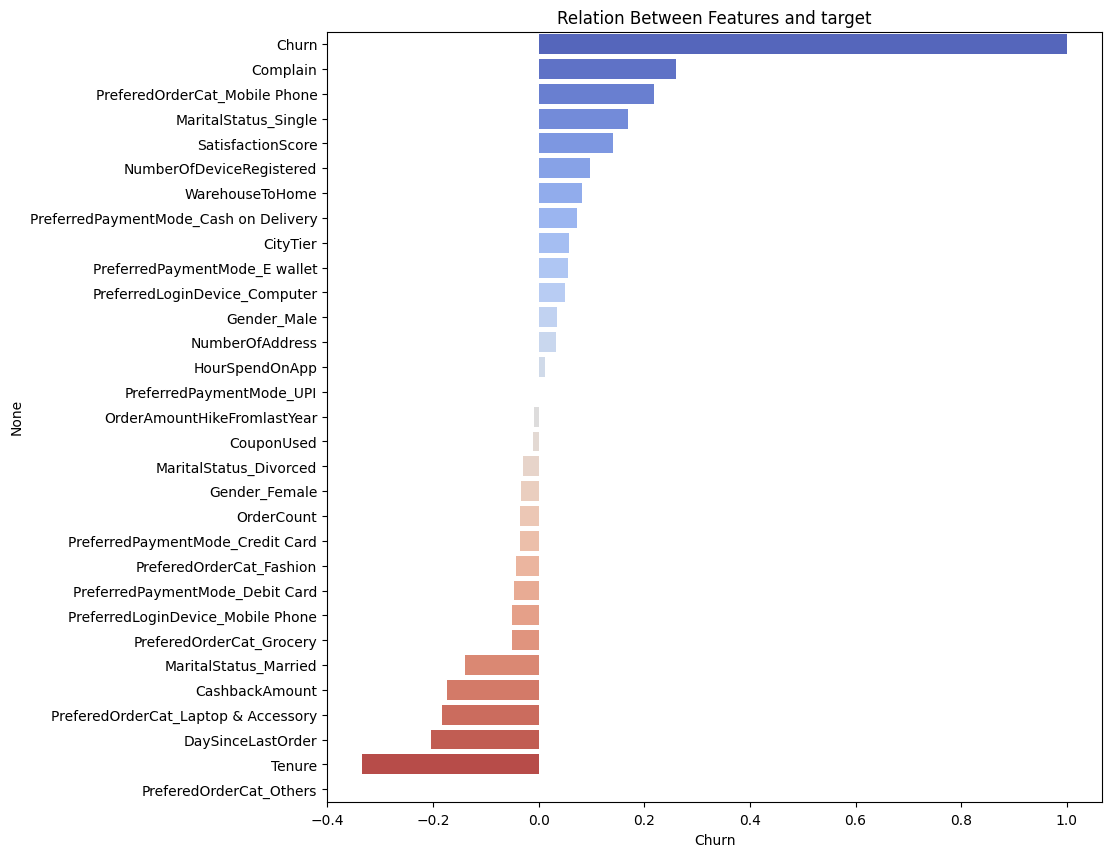

In [92]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [93]:
fig = px.histogram(df1, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()



> Dataset is imbalanced, thus the issue will be addressed using **SMOTE** for oversampling



In [94]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2399
Before upsampling count of label 1 553
After upsampling count of label 0 2399
After upsampling count of label 1 2399


#**Model Development**

*   Initialising the machine learning models and evaluating the best 2 models

*   Comparing the performance of the best 2 models

*   Feature Importance of the Best Model

*   Selecting the most important features for building the predictive model (Creating Simpler models with less but more important features)

*   Evaluating the Best Model

*   Hyperparameter Tuning



### **Model Selection and Training**

In [95]:
#Initialize the models

models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #Tree Based
    DecisionTreeClassifier(),

    #XGBoost
    XGBClassifier()
]

In [96]:
#Initialising the training performance metrics lists
metrics_cols_train = ['model_name','train_accuracy','train_precision','train_recall','train_f1']

model_name=[]
train_accuracy=[]
train_precision=[]
train_recall=[]
train_f1=[]

In [97]:
# Model Evaluation with Cross Validation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, X, y, cv=5,
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    train_accuracy.append(round(cv_results['train_accuracy'].mean(),3)*100)
    train_precision.append(round(cv_results['train_precision'].mean(),3)*100)
    train_recall.append(round(cv_results['train_recall'].mean(),3)*100)
    train_f1.append(round(cv_results['train_f1'].mean(),3)*100)

metrics_data = [model_name, train_accuracy, train_precision, train_recall, train_f1]
m = {n:m for n,m in zip(metrics_cols_train,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('train_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['train_accuracy', 'train_f1'], cmap='summer')
metrics_styled

### **Model Evaluation**

In [98]:
#Initialising the testing performance metrics lists
metrics_cols_test = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [99]:
# Model Evaluation with Cross Validation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, X, y, cv=5,
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_accuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_accuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols_test,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

In [100]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

all_models = pd.DataFrame({'Train_Accuracy': train_accuracy , 'Test_Accuracy' : test_accuracy}, index = model_name)
all_models = all_models.sort_values(by=['Train_Accuracy', 'Test_Accuracy'], ascending=False)
all_models

Train_Accuracy  Test_Accuracy
XGBClassifier                   100.000000      99.300000
RandomForestClassifier          100.000000      98.700000
DecisionTreeClassifier          100.000000      97.900000
BaggingClassifier                99.700000      97.900000
GradientBoostingClassifier       93.600000      92.100000
AdaBoostClassifier               90.100000      89.100000
KNeighborsClassifier             89.000000      85.600000
LogisticRegressionCV             88.400000      88.200000

In [101]:
# Models vs Train Accuracies
fig = px.bar(all_models.sort_values('Train_Accuracy').reset_index(),
             x='Train_Accuracy',
             y = 'index',
             color='Train_Accuracy',
             title="<b>"+'Models Vs Train Accuracies',
             text_auto= True,
             color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='<b>Train Accuracy</b>',
yaxis_title='<b>Models Names</b>',
margin=dict(r=100),
width=1000,
height=600
)
fig.update_traces(textposition='outside')
fig.show()


# Models vs Test Accuracies
fig = px.bar(all_models.sort_values('Test_Accuracy').reset_index(),
             x='Test_Accuracy',
             y = 'index',
             color='Test_Accuracy',
             title="<b>"+'Models Vs Test Accuracies',
             text_auto= True,
             color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='<b>Test Accuracy</b>',
yaxis_title='<b>Models Names</b>',
margin=dict(r=100),
width=1000,
height=600
)
fig.update_traces(textposition='outside')
fig.show()



> From the graphs, it is evident that the best 2 models in Train and Test are **Random Forest** and **XGBoost**



### **Comparsion of Random Forest and XGBoost**

In [102]:
RF_model=RandomForestClassifier()
RF_model.fit(X_train, y_train)
train_pred = RF_model.predict(X_train)
test_pred = RF_model.predict(X_test)

RF_model.score(X_test, y_test)

0.975609756097561

In [103]:
XGB_model=XGBClassifier()
XGB_model.fit(X_train, y_train)
train_pred = XGB_model.predict(X_train)
test_pred = XGB_model.predict(X_test)

XGB_model.score(X_test, y_test)

0.986449864498645

In [104]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

results = {
    'XGBClassifier': evaluate_model(XGB_model, X_test, y_test),
    'RandomForestClassifier': evaluate_model(RF_model, X_test, y_test)
}

pd.set_option('display.float_format', lambda x: '%.6f' % x)

def bold_index_labels(x):
    return ['font-weight: bold' if i in ['XGBClassifier', 'RandomForestClassifier'] else '' for i in x]
# Create a DataFrame directly from the results dictionary


results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.style.apply(bold_index_labels, axis=0)
results_df

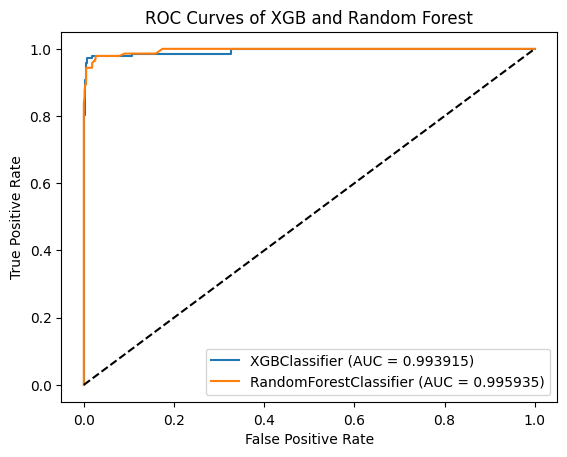

In [105]:
# --- Plot ROC Curves ---
def plot_roc_curve(model, X_test, y_test, ax, label, results_dict):
    """Plots the ROC curve for a given model on the provided axes."""
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.6f})')

# Create a single figure for ROC curves
fig, ax = plt.subplots()
plot_roc_curve(XGB_model, X_test, y_test, ax, 'XGBClassifier', results)
plot_roc_curve(RF_model, X_test, y_test, ax, 'RandomForestClassifier', results)
ax.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves of XGB and Random Forest')
ax.legend(loc='lower right')
plt.show()

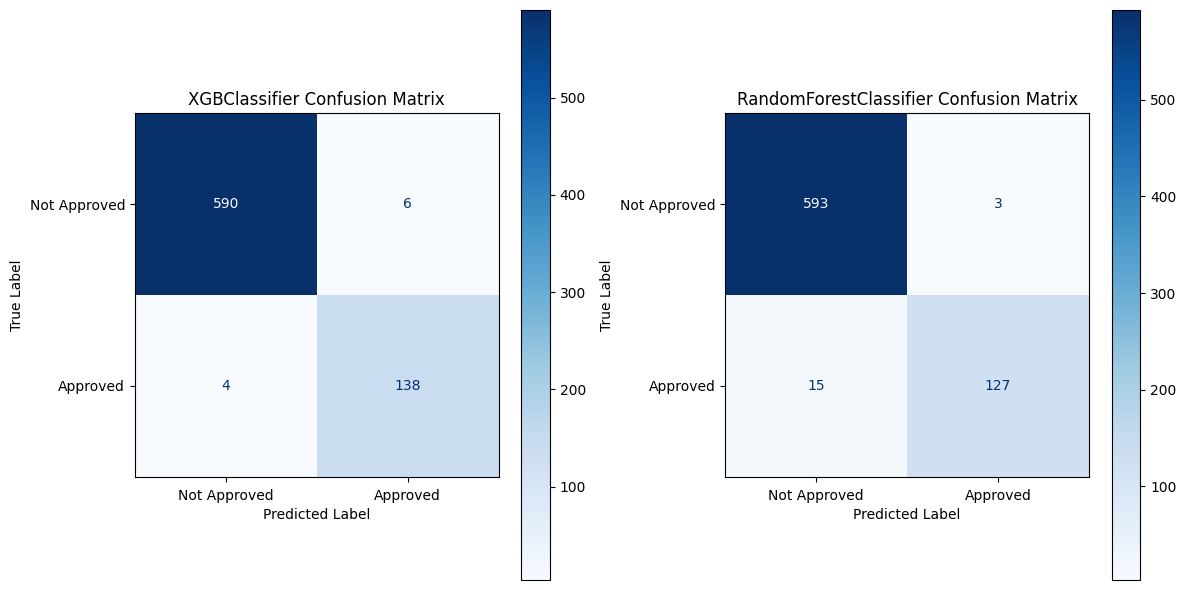

In [106]:
# --- Plot Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

def plot_confusion_matrix(model, X_test, y_test, ax, title):
    """Plots the confusion matrix for a given model on the provided axes."""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Use ConfusionMatrixDisplay with more informative labels and colormap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['Not Approved', 'Approved'])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plot_confusion_matrix(XGB_model, X_test, y_test, axes[0], 'XGBClassifier Confusion Matrix')
plot_confusion_matrix(RF_model, X_test, y_test, axes[1], 'RandomForestClassifier Confusion Matrix')

plt.tight_layout()
plt.show()

> The best model between the two models is **XGBoost**


### **Feature Importance of XGBoost Model**
- Importance_type
    - **weight** - the number of times a feature is used to split the data across all trees.
    - **gain** - the average gain across all splits the feature is used in.

Feature Importance Gain


<Axes: >

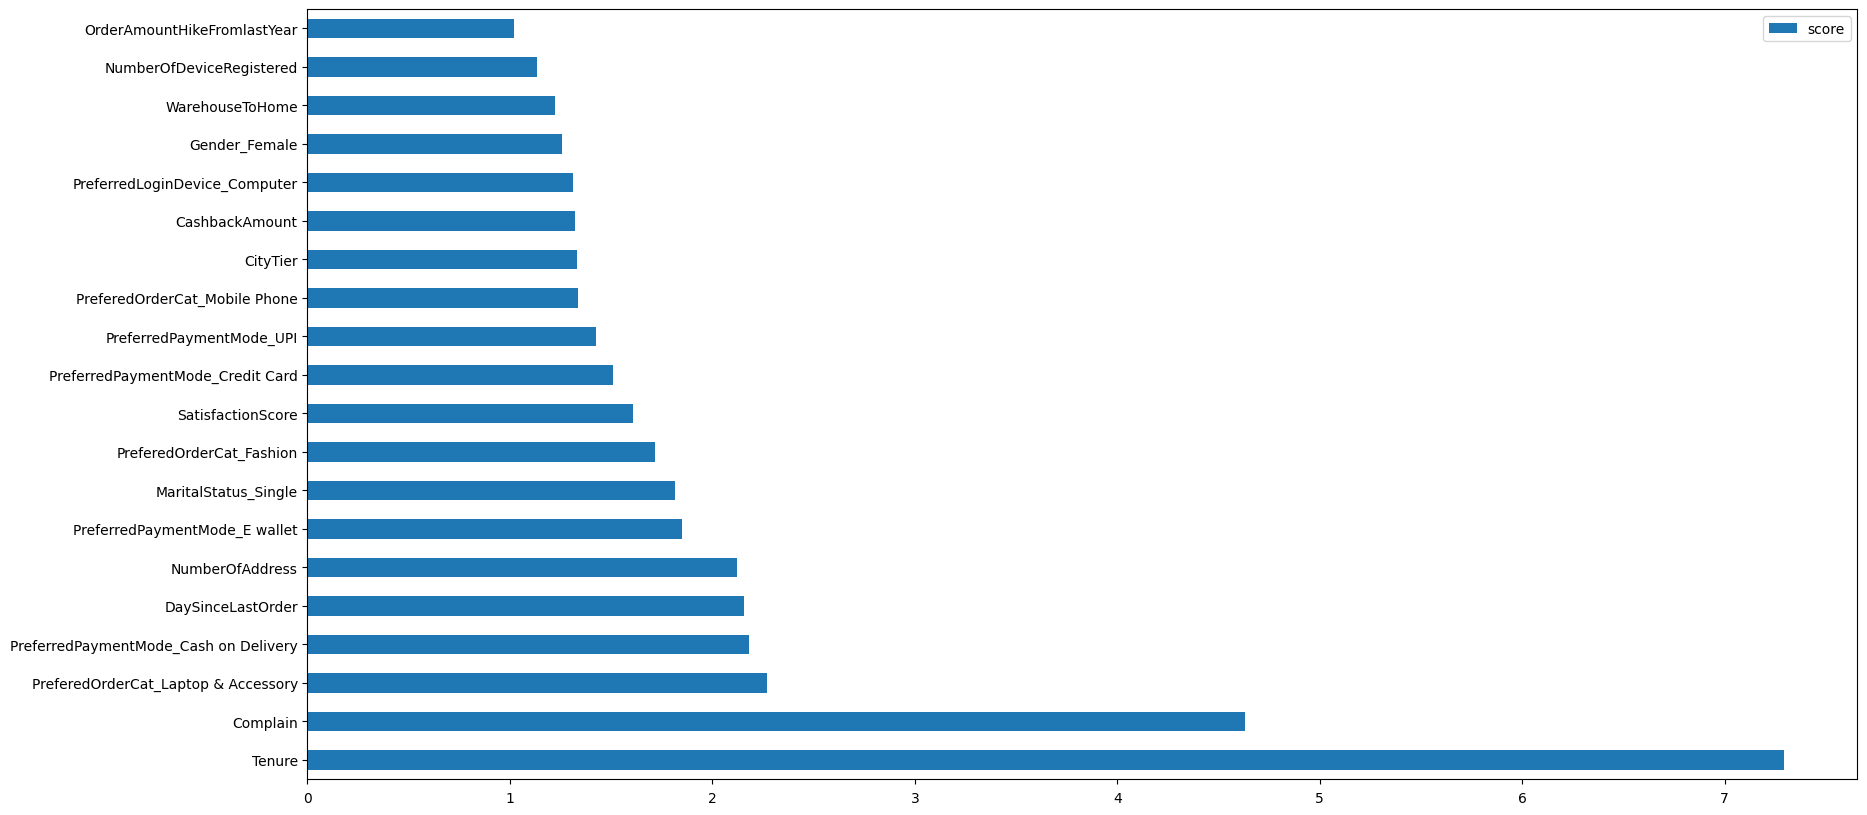

In [107]:
print("Feature Importance Gain")
feature_important = XGB_model.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

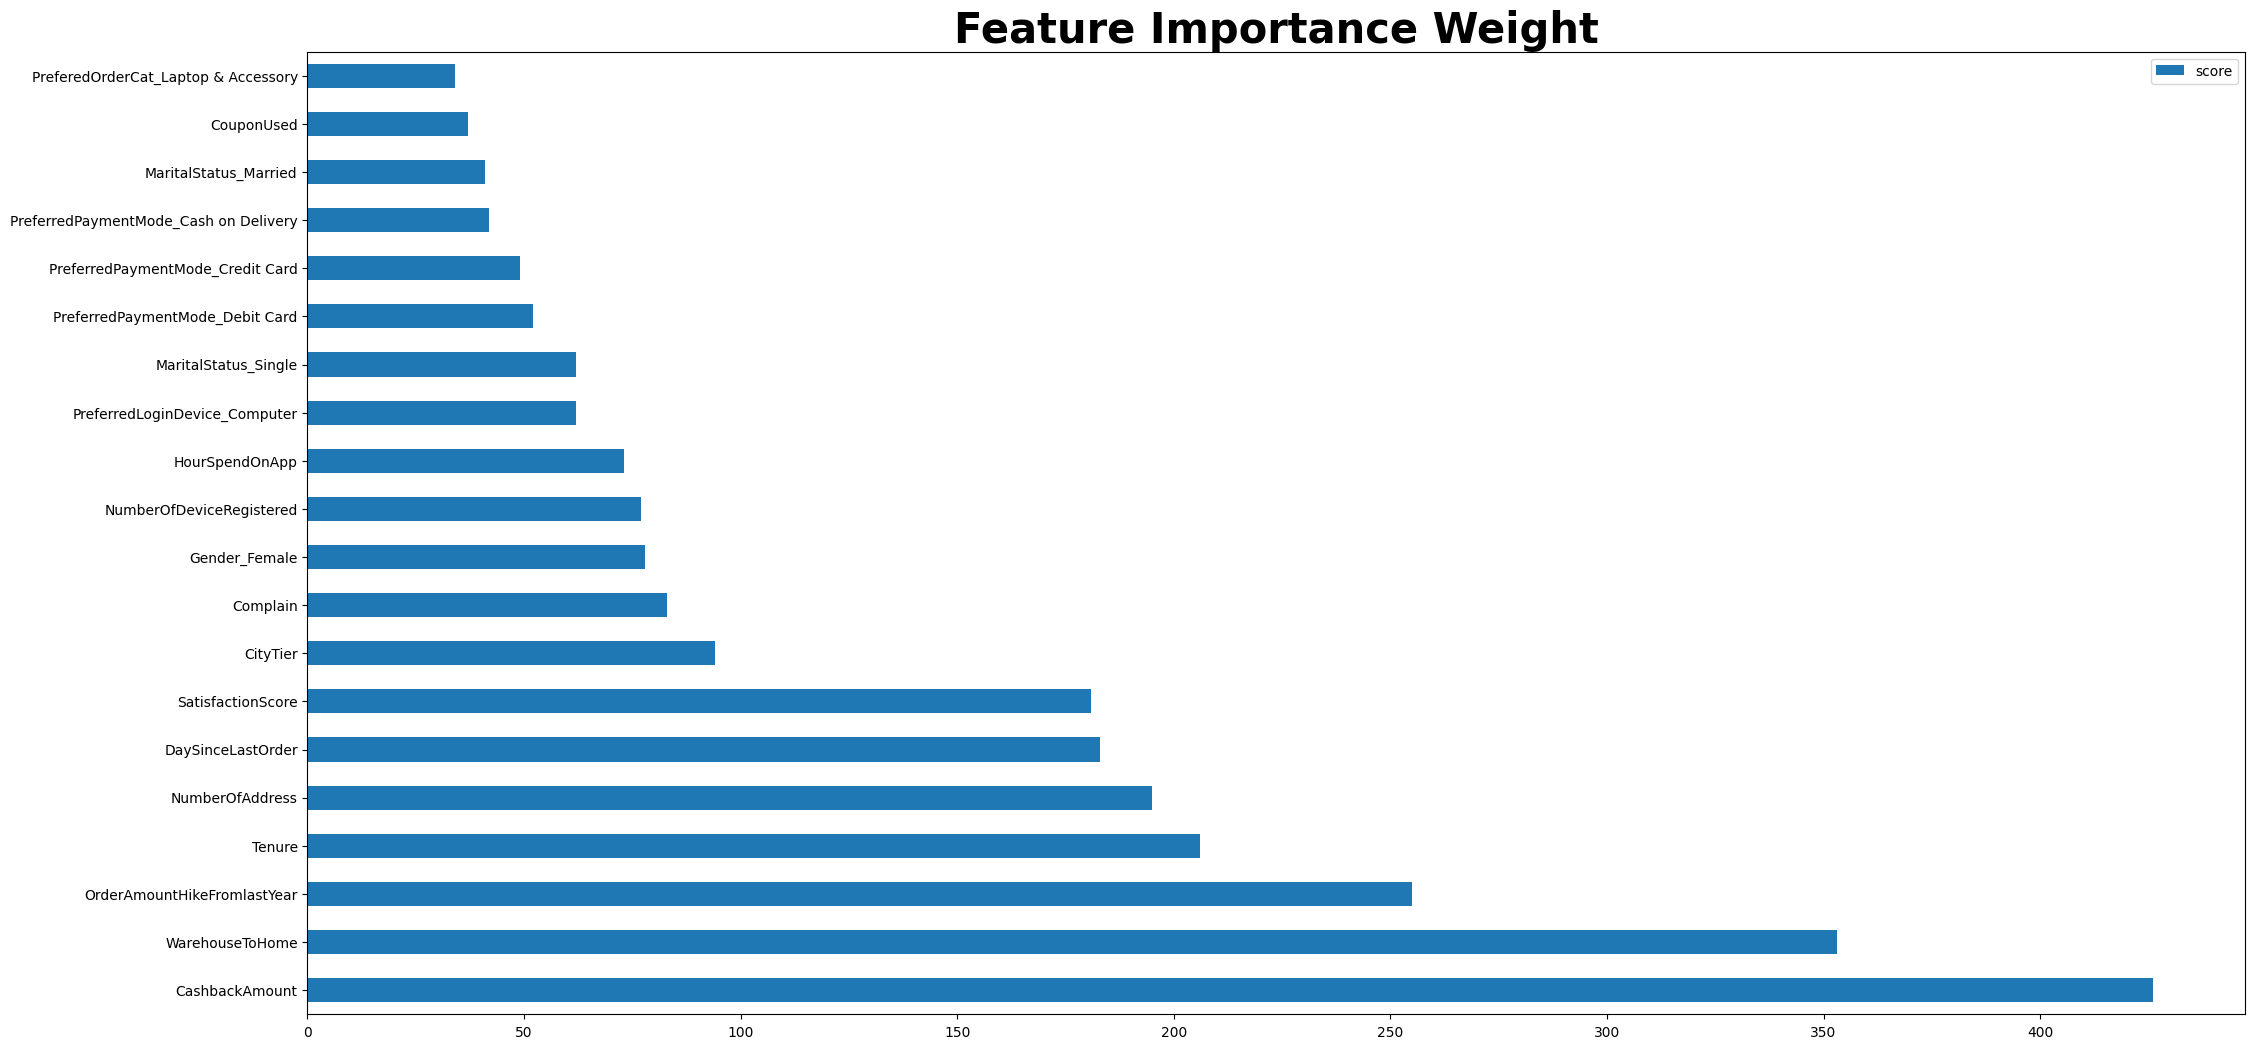

In [108]:
feature_important = XGB_model.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
ax = data.nlargest(20, columns="score").plot(kind='barh', figsize = (25,12.5))
ax.set_title("Feature Importance Weight", fontsize=30, fontweight='bold')
plt.show()

### **Creating Simpler models with less but more important features**

The features that will be used for final deployment model are:
* Tenure
* CashbackAmount
* CityTier
* WarehouseToHome
* OrderAmountHikeFromLastYear
* DaySinceLastOrder
* SatisfactionScore
* NumberOfAddress
* NumberOfDeviceRegistered
* Complain
* OrderCount
* HourSpendOnApp
* MaritalStatus
* CouponUsed
* Gender

In [109]:
X.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [110]:
#select the columns
cols_to_drop = ['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Credit Card',
                'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
                'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
                'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others' ]

X.drop(cols_to_drop, axis = 1, inplace = True)

In [111]:
X_train.drop(cols_to_drop, axis = 1, inplace = True)
X_test.drop(cols_to_drop, axis = 1, inplace = True)

In [112]:
X.head()

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0  4.000000  3.000000         6.000000        3.000000   
1 10.189899  1.000000         8.000000        3.000000   
2 10.189899  1.000000        30.000000        2.000000   
3  0.000000  3.000000        15.000000        2.000000   
4  0.000000  1.000000        12.000000        2.931535   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                  3.000000           2.000000         9.000000  1.000000   
1                  4.000000           3.000000         7.000000  1.000000   
2                  4.000000           3.000000         6.000000  1.000000   
3                  4.000000           5.000000         8.000000  0.000000   
4                  3.000000           5.000000         3.000000  0.000000   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                    11.000000    1.000000    1.000000           5.000000   
1                    15.000000    0.000000    1.000000           0.000000   
2                    14.000000    0.000000    1.000000           3.000000   
3                    23.000000    0.000000    1.000000           3.000000   
4                    11.000000    1.000000    1.000000           3.000000   

   CashbackAmount  Gender_Female  Gender_Male  MaritalStatus_Divorced  \
0      159.930000       1.000000     0.000000                0.000000   
1      120.900000       0.000000     1.000000                0.000000   
2      120.280000       0.000000     1.000000                0.000000   
3      134.070000       0.000000     1.000000                0.000000   
4      129.600000       0.000000     1.000000                0.000000   

   MaritalStatus_Married  MaritalStatus_Single  
0               0.000000              1.000000  
1               0.000000              1.000000  
2               0.000000              1.000000  
3               0.000000              1.000000  
4               0.000000              1.000000

### **Evaluating the XGBClassifier after Feature Importance**

In [113]:
# Run the model
final_model=XGBClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.9701897018970189

In [114]:
def evaluate_model(model, X_test, y_test):
    return {
        'Accuracy': accuracy_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred),
        'F1-Score': f1_score(y_test, test_pred)
    }

results_final = {
    'Final Model - XGBClassifier': evaluate_model(final_model, X_test, y_test),
}

pd.set_option('display.float_format', lambda x: '%.6f' % x)

def bold_index_labels(x):
    return ['font-weight: bold' if i in ['Final Model - XGBClassifier'] else '' for i in x]

# Create a DataFrame directly from the results dictionary
results_final_df = pd.DataFrame.from_dict(results_final, orient='index')
results_final_df = results_final_df.style.apply(bold_index_labels, axis=0)
results_final_df

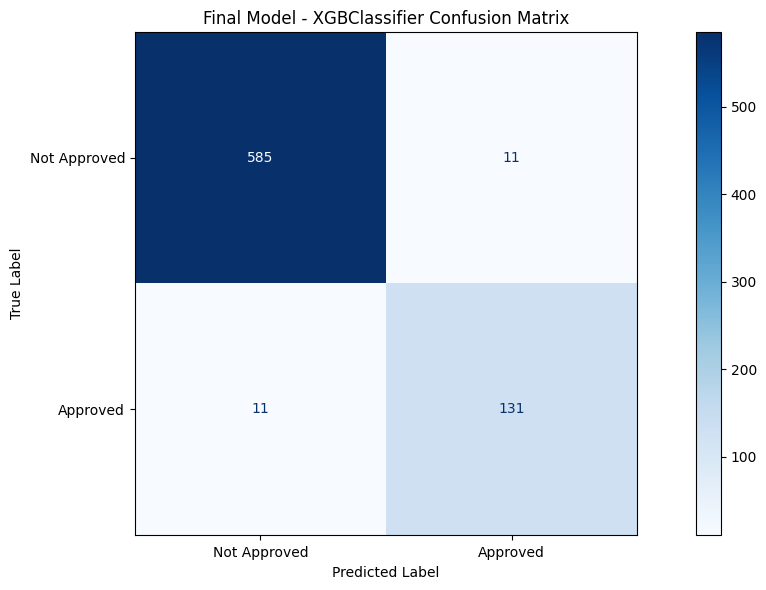

In [115]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size for better visibility
plot_confusion_matrix(final_model, X_test, y_test, ax, 'Final Model - XGBClassifier Confusion Matrix') # Pass the Axes object directly
plt.tight_layout()
plt.show()

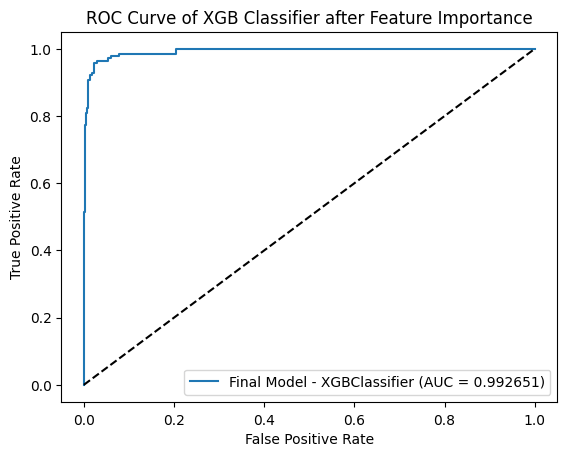

In [116]:
# --- Plot ROC Curve---

fig, ax = plt.subplots()
plot_roc_curve(final_model, X_test, y_test, ax, 'Final Model - XGBClassifier', results_final)
ax.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve of XGB Classifier after Feature Importance')
ax.legend(loc='lower right')
plt.show()

### **Hyperparameter Tuning**

In [117]:
# Define a wider hyperparameter grid to search over
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_grid,
    n_iter=20,  # Increased iterations for wider search space
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [118]:
# Train the final model with the best hyperparameters
final_model_HPT = XGBClassifier(**best_params)
final_model_HPT.fit(X_train, y_train)

# Evaluate the final model
train_pred = final_model_HPT.predict(X_train)
test_pred = final_model_HPT.predict(X_test)

results_final_HPT = {
    'FinalModel - XGBClassifier (After Hyperparameter Tuning)': evaluate_model(final_model_HPT, X_test, y_test),
}

pd.set_option('display.float_format', lambda x: '%.6f' % x)

def bold_index_labels(x):
    return ['font-weight: bold' if i in ['Final Model after Hyperparameter Tuning - XGBClassifier'] else '' for i in x]

# Create a DataFrame directly from the results dictionary
results_final_HPT_df = pd.DataFrame.from_dict(results_final_HPT, orient='index')
results_final_HPT_df = results_final_HPT_df.style.apply(bold_index_labels, axis=0)
results_final_HPT_df

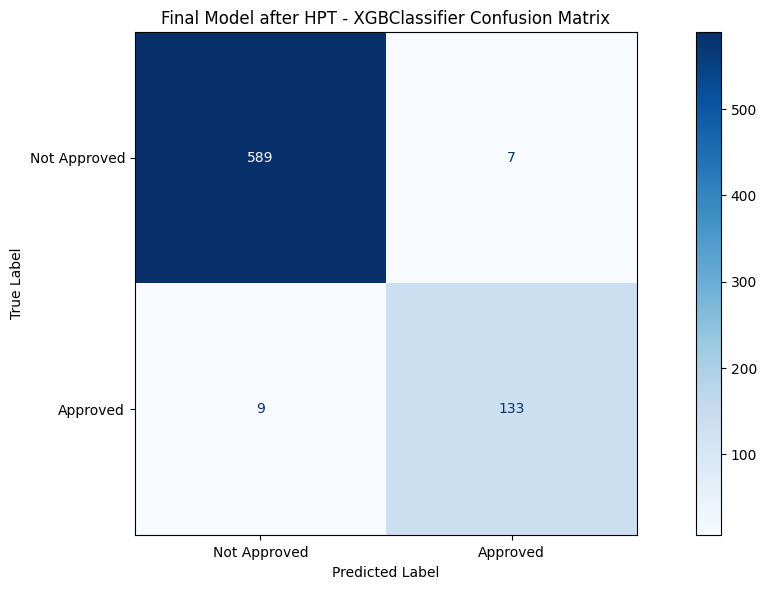

In [119]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size for better visibility
plot_confusion_matrix(final_model_HPT, X_test, y_test, ax, 'Final Model after HPT - XGBClassifier Confusion Matrix') # Pass the Axes object directly
plt.tight_layout()
plt.show()

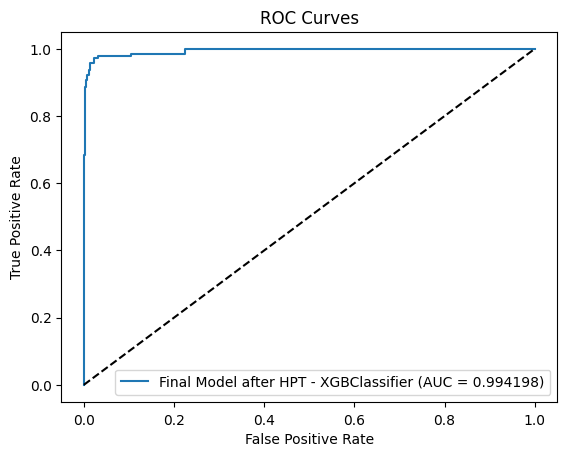

In [120]:
# --- Plot ROC Curve---

fig, ax = plt.subplots()
plot_roc_curve(final_model_HPT, X_test, y_test, ax, 'Final Model after HPT - XGBClassifier', results_final)
ax.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc='lower right')
plt.show()

### **Final Deployment Model**

In [121]:
compare_df = pd.concat([results_final_df.data, results_final_HPT_df.data], axis=0)
compare_df = pd.DataFrame(compare_df)
compare_df = compare_df.style.apply(bold_index_labels, axis=0)
compare_df

In [122]:
# Make predictions on the test set
y_pred = final_model_HPT.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
XGBoost_df = pd.DataFrame(results, columns=['Actual', 'Predicted'])

# Print the DataFrame
pd.concat([XGBoost_df.head(20), XGBoost_df.tail(20)])

Actual  Predicted
0   0.000000          0
1   0.000000          0
2   0.000000          0
3   0.000000          0
4   0.000000          0
5   0.000000          0
6   1.000000          0
7   0.000000          0
8   0.000000          0
9   0.000000          0
10  0.000000          0
11  0.000000          0
12  0.000000          0
13  0.000000          0
14  1.000000          1
15  0.000000          0
16  0.000000          0
17  1.000000          1
18  0.000000          0
19  0.000000          0
718 0.000000          0
719 0.000000          0
720 0.000000          0
721 0.000000          0
722 0.000000          0
723 0.000000          0
724 0.000000          0
725 0.000000          0
726 0.000000          0
727 0.000000          0
728 1.000000          1
729 0.000000          0
730 0.000000          0
731 0.000000          1
732 1.000000          1
733 0.000000          0
734 1.000000          0
735 0.000000          0
736 0.000000          0
737 0.000000          0